<h2>Материалы <a class="tocSkip"> </h2>

- [Презентация](https://disk.yandex.ru/i/_n3cjlRZmdaV2A)
- [Дашборд](https://public.tableau.com/views/Kirillov_final_tableau/Dashboard__?:language=en-US&:display_count=n&:origin=viz_share_link)

<h2>Описание проекта <a class="tocSkip"> </h2>

**Заказчик** - Генеральный директор приложения "Ненужные вещи"
    
**Цель проекта:** - выявить инсайты для повышения конверсии у целевого действия, а также повышения удержания пользователей в приложении
    
**Задачи проекта:**
- Провести сегментацию пользователей
- Выявить сегменты, которые нуждаются в повышении конверсии
- Дать рекомендации по повышению удержания пользователей различных сегментов
- Проверить гипотезу о том, что конверсия пользователей из yandex не равна конверсии пользователей из google
- Проверить гипотезу о том, что конверсия дневных пользователей не равна конверсии вечерних пользователей

**Входные данные»**

Датасет **mobile_dataset.csv** содержит логи пользователей (каждая запись в логе — это действие пользователя, или событие):
- `event.time` — время совершения
- `event.name` — название события
- `user.id` — идентификатор пользователя

Датасет **mobile_sources.csv** содержит информацию о зарегистрированных пользователях:
- `userId` — идентификатор пользователя
- `source` — источник, с которого пользователь установил приложение

Расшифровки событий датасета **mobile_dataset.csv**:
- `advert_open` — открытие карточки объявления
- `photos_show` — просмотр фотографий в объявлении
- `tips_show` — пользователь увидел рекомендованные объявления
- `tips_click` — пользователь кликнул по рекомендованному объявлению
- `contacts_show` и `show_contacts` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления
- `contacts_call` — пользователь позвонил по номеру телефона на карточке объявления
- `map` — пользователь открыл карту размещенных объявлений
- `search_1` — `search_7` — разные события, связанные с поиском по сайту
- `favorites_add` — добавление объявления в избранное

**План работ:**
<a id="introduction"></a>
- **[Изучение общей информации:](#start)**
    - Импорт библиотек; 
    - Открытие файлов; 
    - Первичный взгляд на данные (info, head). 
- **[Предобработка данных:](#preprocessing)** 
    - Проверить корректность наименований колонок; 
    - Переименовать колонки (по необходимости); 
    - Исследовать пропущенные значения; 
    - Заменить пропущенные значения; 
    - Исследовать соответствие типов данных; 
    - Привести типы (по необходимости); 
    - Исследовать наличие дубликатов; 
    - Удалить дубликаты (по необходимости); 
    - Проверить датасет на выбросы и удалить их. 
- **[Исследовательский анализ данных:](#analysis)**
    - [Написание общих функций](#functions);
    - Исследовать уникальных пользователей (профили пользователей); 
    - Изучить поток пользователей из каждого источника;
    - Исследовать диапозон дат датасета;
    - Расчитать retention rate для пользователей;
    - Исследовать численность каждого события;
    - Расчитать время, проведённое в приложении, для пользователей (создание сессий пользователей);
    - Расчитать частоту действий для пользователей;
    - Расчитать конверсию в целевое действие — просмотр контактов (`contacts_show`).
        - Общая конверсия по датасету / воронка продаж;
        - Конверсия по источниках прихода;
        - Конверсия по времени суток (утро / день / вечер / ночь).
- **[Сегментация:](#segmentation)**
    - Сегментирование пользователей по показателю на 3-4 группы;
    - Для каждой группы считаем Retention rate;
    - Для каждой группы считаем конверсию.
- **[Проверка статистических гипотез:](#hypotheses)**
    - Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов. Н_0: конверсия пользователей из yandex == конверсия пользователей из google. Н_а: конверсия пользователей из yandex != конверсия пользователей из google;
    - Какие - то пользователи заходят в наше приложение днем (12:00 - 18:00), а какие - то вечером (18:00 до 00:00). Наш менеджер утверждает, что вечером люди чаще нажимают кнопку "показать контакт" и созваниваются с потенциальным продавцом. Проверим гипотезу: две эти *группы* демонстрируют разную конверсию в просмотры контактов. Н_0: конверсия дневных пользователей == конверсия вечерних пользователей. Н_а: конверсия дневных пользователей != конверсия вечерних пользователей.
- **[Выводы и общие рекомендации](#end)**

## Изучение общей информации

<a id="start"></a>
[Описание проекта](#introduction)

### Импорт библиотек

In [1]:
#Импортируем библиотеку Pandas
import pandas as pd
#Импортируем модуль pyplot библиотеки matplotlib
from matplotlib import pyplot as plt
# Импортируем библиотеку numpy
import numpy as np
#Импортируем библиотеку seaborn
import seaborn as sns
# Импортируем модуль для проведения z-теста из scipy
from scipy import stats as st
# Импортируем библиотеку math
import math as mth
#Импортируем модуль timedelta и времени из datetime
from datetime import timedelta, time
# Напишем следующий код для отключения всплывающих предупреждений
pd.options.mode.chained_assignment = None



### Первичный взгляд на данные

In [2]:
#Напишем  функцию для сохранения датасета в переменную
#а также вывода общей информации
def read_file(file_name): #На вход поступает наименование файла
    data = pd.read_csv(file_name)
    display(data.info())
    display(data.head())
    try:
       data.hist() #Если в датасете нету параметров, которые можно было бы отобразить гистограммой
    except ValueError: #то мы пропускаем этот шаг
        pass
    return data #Возвращаем наш датасет

In [3]:
#Сохраним датасет с логами в переменную logs
logs = read_file('Ссылка_на_датасет')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


None

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


- Всего имеем три столбца
- Пропусков в датасете нету
- Необходимо привести наименования всех столбцов к змеиному регистру
- Также в последующем приведем столбец `event.time` к типу "datetime"
- Уберем в столбце `event.time` милисекунды
- Столбцы, в которых могли бы быть выбросы - отсутсвуют

In [4]:
#Сохраним датасет с пользователями и источниками их привлечения
#в переменную sources
sources = read_file('Ссылка_на_датасет')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


None

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


- Пропуски в датасете отсутсвуют
- Необходимо привести наименование столбца userId к змеиному регистру
- Столбцы, в которых могли бы быть выбросы - отсутсвуют

## Предобработка данных

<a id="preprocessing"></a>
[Описание проекта](#introduction)

### Наименования колонок

In [5]:
#Приведем наименования столбцов к змеиному регистру
logs = logs.rename(columns={'event.time':'event_time','event.name':'event_name', 'user.id':'user_id'})
#Проверим изменения
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_time  74197 non-null  object
 1   event_name  74197 non-null  object
 2   user_id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [6]:
#Приведем наименования столбцов к змеиному регистру
sources = sources.rename(columns={'userId':'user_id'})
#Проверим изменения
sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  4293 non-null   object
 1   source   4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


Все столбцы успешно переименованы.

### Тип данных

In [7]:
# Приведем столбец 'event_time' к типу datetime
# также обрежем милисекунды для удобство вычислений в последующем
logs['event_time'] = pd.to_datetime(logs['event_time']).dt.floor('S')

In [8]:
logs.head()

,event_time,event_name,user_id
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


### Дубликаты в данных

#### Явные дубликаты

In [9]:
#Посчитаем количество дубликатов в датасете logs
logs.duplicated().sum()

1143

В датасете `logs` выявлено `1143` явных дубликата, посчитам, сколько это в процентах от всего датасета.

In [10]:
#Считаем процент от всего датасета
print('Процент явных дубликатов составляет ' 
      f'{round(logs.duplicated().sum() / logs.shape[0] * 100, 2)} %')


Процент явных дубликатов составляет 1.54 %


При таком малой доли от всего датасета (1.54%) смело удаляем дубликаты

In [11]:
#Удаляем дубликаты
logs = logs.drop_duplicates()

In [12]:
#Посчитаем количество дубликатов в датасете sources
sources.duplicated().sum()

0

Явных дубликатов в датасете `sources` выявлено не было.

#### Неявные дубликаты

In [13]:
#Произведем проверку на неявные дубликаты в наименованиях событий
logs['event_name'].sort_values().unique()

array(['advert_open', 'contacts_call', 'contacts_show', 'favorites_add',
       'map', 'photos_show', 'search_1', 'search_2', 'search_3',
       'search_4', 'search_5', 'search_6', 'search_7', 'show_contacts',
       'tips_click', 'tips_show'], dtype=object)

- Проверка не выявила неявных дубликатов
- `search_1` — `search_7` — разные события, связанные с поиском по сайту (фильтры, диапозоны поиска и т.п.). В нашем исследовании они не играют большой роли и не влияют на достижение цели исследования, поэтому мы их объединим в один `search`.
- `contacts_show` и `show_contacts` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления. Данные события полностью идентичные и дублируют друг друга, так вышло из - за возможной выгрузки из различных источников, поэтому переименуем их в одно - `contacts_show`.

In [14]:
# Объединим все search_n в один search
logs['event_name'] = (logs['event_name']
                      .replace(['search_1', 'search_2', 'search_3',
                                'search_4', 'search_5', 'search_6',
                                'search_7'], 'search'))
# Объединим 'show_contacts' и 'contacts_show' в 'contacts_show'
logs['event_name'] = logs['event_name'].replace('show_contacts', 'contacts_show')

In [15]:
#Проверим, что все успешно заменилось
logs['event_name'].sort_values().unique()

array(['advert_open', 'contacts_call', 'contacts_show', 'favorites_add',
       'map', 'photos_show', 'search', 'tips_click', 'tips_show'],
      dtype=object)

In [16]:
#Произведем проверку на неявные дубликаты в источниках
sources['source'].sort_values().unique()

array(['google', 'other', 'yandex'], dtype=object)

Проверка не выявила неявных дубликатов в данном датасете

## Исследовательский анализ данных

<a id="analysis"></a>
[Описание проекта](#introduction)

### Блок с функциями

<a id="functions"></a>

In [17]:
# Зададим функцию, которая соберет нам пользовательские профили
def get_profiles(logs):
    profiles = (logs.sort_values(by=['user_id','event_time']).groupby('user_id').agg({'event_time': 'first','event_name': 'first', 'source': 'first'}).rename(columns={'event_time': 'first_ts'}).reset_index())
    
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['dt'].astype('datetime64[M]') 
    # profiles = profiles.merge(sources, on='user_id', how='inner')
    return profiles
    

In [18]:
#Напишем функцию, чтобы выводить столбчатую диаграмму и круговую в связке 

#Зададим следующие параметры:
# df - датафрейм, x_axis - наименовае столбца для оси x
# y_axis - наименовае столбца для оси у
# colors - цветовая палитра для графиков (по умолчанию = sns.color_palette('pastel')[0:5])
# height - высота общего графика(по умолчанию = 8), width - ширина обшего графика (по умолчанию = 16)
# xlabelbar (по умолчанию = False), ylabelbar (по умолчанию = False) display_value - выводить ли значения столбцов (по умолчанию = False)
# pie_name - наименование кругового графика (по умолчанию = False), bar_name - наимнование столбчатой диаграммы (по умолчанию = False)

def bar_pie_chart(df, x_axis, y_axis, colors=sns.color_palette('pastel')[0:5],
             height=8,width=16, xlabelbar=False, ylabelbar=False,
               display_value=False, pie_name=False, bar_name=False):

    #Установим стиль нашим графикам из библиотеки seaborn
    sns.set_style('whitegrid') 
    #Зададим оси
    fig, (ax1, ax2) = plt.subplots(1, 2)

    #Построение первого графика
    plt.subplot(1, 2, 1)
    ax1 = sns.barplot(x=x_axis, y=y_axis, data=df, palette = colors)
    plt.xticks(rotation = 90)
    if xlabelbar != False:
        ax1.set_xlabel(xlabelbar, fontweight="bold")
    
    if ylabelbar != False:
        ax1.set_ylabel(ylabelbar, fontweight="bold")
    
    if bar_name != False:
        ax1.set_title(bar_name, fontweight="bold", fontsize=14)
    

    if display_value == True:
    #Добавим подписи значений на barplot
        for bar in ax1.patches:
            ax1.annotate(format(bar.get_height(), '.2f'),
                        (bar.get_x() + bar.get_width() / 2,
                            bar.get_height()), ha='center', va='center',
                        size=12, xytext=(0, 8),
                        textcoords='offset points')

    #Построение 2 графика
    plt.subplot(1, 2, 2)
    ax2 = plt.pie(df[y_axis], labels = df[x_axis], colors = colors, autopct='%.2f%%')
    if pie_name != False:
        plt.title(pie_name, fontweight="bold", fontsize=14)

    #Задаем ширину и высоту общему графику
    fig.set_figheight(height) 
    fig.set_figwidth(width)

In [19]:
# Зададим функцию для составления пользовательских сессий

def get_sessions(logs, timeout): # На вход поступает датасет и таймаут в формате 'NMin'
                                 # Например - '10Min'
    # Начнем с того, что отфильтруем наши события по id пользователя
    # а потом по событию - это необходимо для создания id сессии
    sessions_inter = logs.sort_values(['user_id', 'event_time'])
    # Конвертируем в тип данных datetime
    sessions_inter['event_time'] = pd.to_datetime(sessions_inter['event_time'])
    # Определим разницу в N минут для каждой группы при помощи метода cumsum()
    new_col = (sessions_inter.groupby('user_id')['event_time'].diff() > pd.Timedelta(timeout)).cumsum()
    # Добавим в наш датасет счетчик сессий
    sessions_inter['session_id'] = sessions_inter.groupby(['user_id', new_col], sort=False).ngroup() + 1

    # Группируем промежуточный датасет по получившимся номерам сессий,
    # добавляем минимальную дату для данной сессии - это будет стартом сессии
    sessions = (sessions_inter.groupby('session_id', as_index=False)['event_time']
                .min()
                .rename(columns={'event_time': 'start_session'}))
    #Добавляем к нашим сессиям столбец с максимальной датой для сессии - 
    # это будет нашим окончанием сессии
    sessions =  sessions.merge(sessions_inter.groupby('session_id', as_index=False)['event_time']
                .max()
                .rename(columns={'event_time': 'end_session'}), how='inner', on='session_id')
    
    #Добавляем к нашим сессиям id пользователей и источник, из которого они совершили эту сессию
    sessions = sessions.merge(sessions_inter.drop(columns=['event_time','event_name']), how='inner', on='session_id')
    #Удалим дубликаты, которые образуются при объединении таблиц
    sessions = sessions.drop_duplicates().reset_index(drop=True)
    
    #Поместим столбцы местами
    sessions = sessions[['user_id', 'source', 'session_id', 'start_session', 'end_session']]

    # Добавим столбец с длительностью сессий в минутах и секундах
    sessions['session_duration'] = ((sessions['end_session'] - sessions['start_session']).astype('timedelta64[s]') // 60) + \
          ((sessions['end_session'] - sessions['start_session']).astype('timedelta64[s]')) % 60 / 100

      #Возвращаем пользовательские логи с добавленными id сессий, а также датасет с сессиями
    return sessions_inter, sessions

In [20]:
#Зададим функцию для расчета удержания

# У функции есть следующие параметры:
# profiles - датасет с профилями пользователей
# sessions - датасет с сессиями пользователей
# observation date - момент анализа данных
# horizon_days - горизонт анализа данных
# ignore_horizon -игнорируем горизонт анализа данных или нет (по умолчанию - False)
# dimensions -  lдополнительные столбцы для группировки удержания(по умолчанию пустой список, группировка происходит только по дате)

def get_retention(profiles, sessions, observation_date, horizon_days, ignore_horizon=False, dimensions = []):

    # Исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'start_session']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['start_session'] - result_raw['first_ts']
    ).dt.days

    # Напишем функцию для составления таблицы удержания в разрезе заданного измерения
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим "треугольную таблицу" 
        cohort_sizes = result[[0]].rename(columns={0: 'cohort_size'})                                            # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты - расчитываем % удержания (retention rate)
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        return result
    
    if len(dimensions)!=0:
        result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
        return result_raw, result_grouped
    
    # Рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=['dt'], columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = result_grouped[[0]].rename(columns={0: 'cohort_size'})

    result_grouped = cohort_sizes.merge(
        result_grouped, on='dt', how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # Исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # Восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # Возвращаем сырые данные и таблицу удержания
    return result_raw, result_grouped

In [21]:
# Напишем функцию, которая выводит графики retention rate

#Параметры следующие:
#df - таблица с расчитанным retention rate
#vmin - нижняя граница контраста хитмепа (по умолчанию = 0), vmax - верхняя граница контраста хитмепа (по умолчанию = 1)
#title - заголовок для линейной диаграммы
def plot_retention(df, vmin=0, vmax=1, title=False):
    # Подготовим датафрейм удалив столбец с размером когорты
    # и ее количеством
    report = df.drop(columns = ['cohort_size', 0])
    # Строим график
    report.T.plot(
        grid=True,  # добавляем сетку
        xticks=list(report.columns.values),  # отметки на оси X — названия колонок
        figsize=(15, 6),  # размер графика
    )
    plt.xlabel('Лайфтайм')  # название оси X
    if title != False:
        plt.title(title)  # название графика
    plt.show() 

    # Задаем размер heatmap
    plt.figure(figsize=(15, 8)) 
    # Строим heatmap
    sns.heatmap(
    df.drop(columns=['cohort_size']),  # удаляем размеры когорт
        annot=True,  # включаем подписи
        fmt='.2%', vmin=vmin, vmax=vmax # переводим значения в проценты
    )
    plt.title('Тепловая карта удержания')  # название графика
    plt.show() 

In [22]:
# Напишем функцию для расчета конверсии

def get_conversion(
    profiles,
    contacts_show,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Определяем дату и время первого показа контактов для каждого пользователя
    first_show = (
        contacts_show.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # Добавляем данные о показах в профили
    result_raw = result_raw.merge(
        first_show[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # Рассчитываем лайфтайм для каждого показа
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['dt']
    ).dt.days

    # Группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # Функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # Делим каждую «ячейку» в строке на размер когорты
        # И получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # Получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # Для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # Получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # Возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [23]:
# Напишем функцию, которая выводит графики по конверсии

def plot_conversion(df, title=False):
    
    # Нашей функции на вход будет подаваться два параметра:
    # df - датафрейм с конверсией
    # title - заголовок для графика с кривыми удержания
    
    # Размер сетки для графиков
    plt.figure(figsize=(25, 8)) 

    # Выведем линейний график конверсии по источникам привлечения
    # Удаляем колонку с размером когорты
    report = df.drop(columns=['cohort_size'])
    report.T.plot(
        grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 1)
    )
    # Добавляем заголовок нашему графику
    if title != False:
        plt.title(title, fontsize=14, fontweight="bold")
    # Подпись оси X
    plt.xlabel('Лайвтайм', fontsize=12)
    # Подпись оси Y
    plt.ylabel('Конверсия', fontsize=12)

    # Строим heatmap
    sns.heatmap(
    df.drop(columns=['cohort_size']),  # удаляем размеры когорт
        annot=True,  # включаем подписи
        fmt='.2%',  ax=plt.subplot(1, 2, 2)# переводим значения в проценты
    )
    # Добавляем заголовок нашему графику
    plt.title('Тепловая карта конверсии', fontsize=14, fontweight="bold")  # название графика

In [24]:
# Напишем функцию для проведения z - теста
# На вход поступают следующие параметры:
#success_1 - количество успехов из общей выборки №1
#leads_1 - размер общей выборки №1
#success_2 - количество успехов из общей выборки №2
#leads_2 - размер общей выборки №2
#alpha - Уровень значимости p-value (по умолчанию alpha = 0.05)
def z_test_hyp(success_1, success_2, leads_1, leads_2, alpha=0.05):

    success = np.array([success_1, success_2])
    leads = np.array([leads_1, leads_2])

    # Пропорция успехов в первой группе:
    p1 = success[0]/leads[0]

    # Пропорция успехов во второй группе:
    p2 = success[1]/leads[1]

    # Пропорция успехов в комбинированном датасете:
    p_combined = (success[0] + success[1]) / (leads[0] + leads[1])

    # Разница пропорций в датасетах
    difference = p1 - p2 
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))
    distr = st.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', round(p_value, 3))

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        )

In [25]:
# Напишем функцию для расчета общей конверсии по группам
# На вход подаются следующие параметры:
# df - датафрейм с логами и проставленной группой
# group - сегмент, по которому необходимо расчитать конверсию (string)

def general_conversion(df, group):
    # Создаем датасет, который хранит пользователей дневной группы
    df = df[df['part_of_day'] == group]
    # Всего уникальных пользователей
    leads_conv = df['user_id'].nunique()
    # Всего уникальных пользователей, совершивших целевое действие
    success_conv = df[df['event_name'] == 'contacts_show']['user_id'].nunique()
    
    print (f'Общая конверсия для сегмента {group} составляет {round(success_conv / leads_conv * 100, 2)}%' )

### Пользовательские профили

In [26]:
#Для начала добавим к нашим логам источники из датасета sources
logs = logs.merge(sources, how='left', on='user_id')
logs.head()

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex


In [27]:
# Сохраним пользовательские профили в переменной profiles
profiles = get_profiles(logs)
# Отобразим первые 5 строк получившегося датафрейма
display(profiles.head())
# Выведем количество уникальных пользователей
print('Количество уникальных пользователей составляет -',profiles.shape[0])

,user_id,first_ts,event_name,source,dt,month
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45,tips_show,other,2019-10-07,2019-10-01
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33,search,yandex,2019-10-19,2019-10-01
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35,photos_show,yandex,2019-11-01,2019-11-01
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:05,search,google,2019-10-18,2019-10-01
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41,contacts_show,yandex,2019-10-25,2019-10-01


Количество уникальных пользователей составляет - 4293


### Изучение источников

In [28]:
# Создадим сводную таблицу по источникам
pivot_source = (profiles
                .groupby('source', as_index=False)['event_name']
                .count()
                .rename(columns={'event_name':'count_of_profiles'})
                .sort_values(by='count_of_profiles', ascending=False)
                .reset_index(drop=True))
pivot_source

,source,count_of_profiles
0,yandex,1934
1,other,1230
2,google,1129


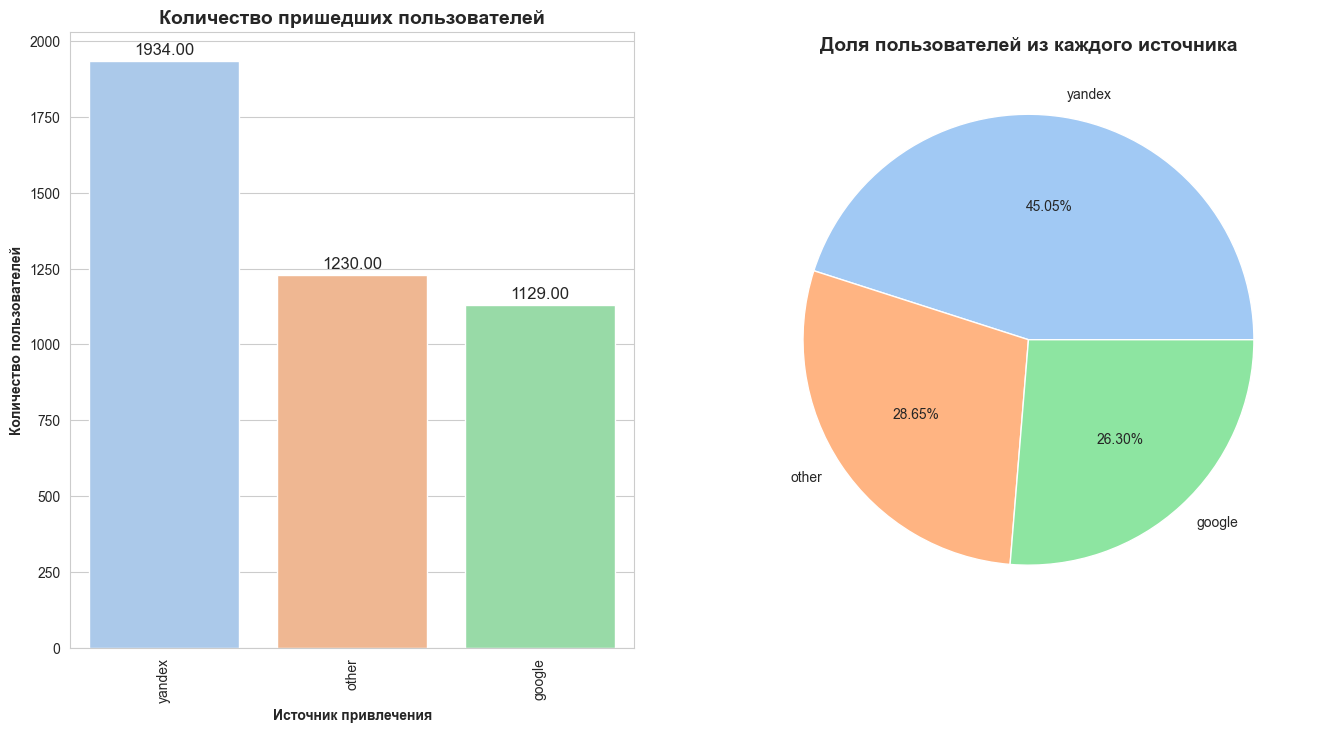

In [29]:
bar_pie_chart(pivot_source, 'source', 'count_of_profiles',
                xlabelbar='Источник привлечения', ylabelbar='Количество пользователей',
                display_value=True, pie_name='Доля пользователей из каждого источника',
                bar_name='Количество пришедших пользователей')

Количество пользователей пришедших из различных источников:
- yandex - 1934 (45.05%)
- other - 1230 (28.65%)
- google - 1129 (26.3%)

Меньше всего пользователей находят нас через `google`, возможно, стоит увеличить рекламу в данном источнике, если мы рассматриваем его как основной и равный по значимости `yandex`.

### Временной диапозон

In [30]:
#Минимальная дата привличения пользователей
min_date = profiles['dt'].min()
#Максимальная дата привличения пользователей
max_date = profiles['dt'].max()
print('Минимальная дата привлечения пользователей:', min_date)
print('Максимальная дата привлечения пользователей:', max_date)

Минимальная дата привлечения пользователей: 2019-10-07
Максимальная дата привлечения пользователей: 2019-11-03


- Первая дата привлечения пользователей из датасета совпадает со сроком, указанным в условиях проекта;
- В датасете собраны новые пользователи, которые зарегистрировались в период с 7 октября по 3 ноября 2019 года включительно.

In [31]:
# Посчитаем сколько дней в нашем датасете
print('Всего дней в датасете -',round(int((logs['event_time'].max() - logs['event_time'].min()).total_seconds()) / 86400))

Всего дней в датасете - 28


(array([18178., 18182., 18186., 18190., 18194., 18198., 18201.]),
 [Text(18178.0, 0, '2019-10-09'),
  Text(18182.0, 0, '2019-10-13'),
  Text(18186.0, 0, '2019-10-17'),
  Text(18190.0, 0, '2019-10-21'),
  Text(18194.0, 0, '2019-10-25'),
  Text(18198.0, 0, '2019-10-29'),
  Text(18201.0, 0, '2019-11-01')])

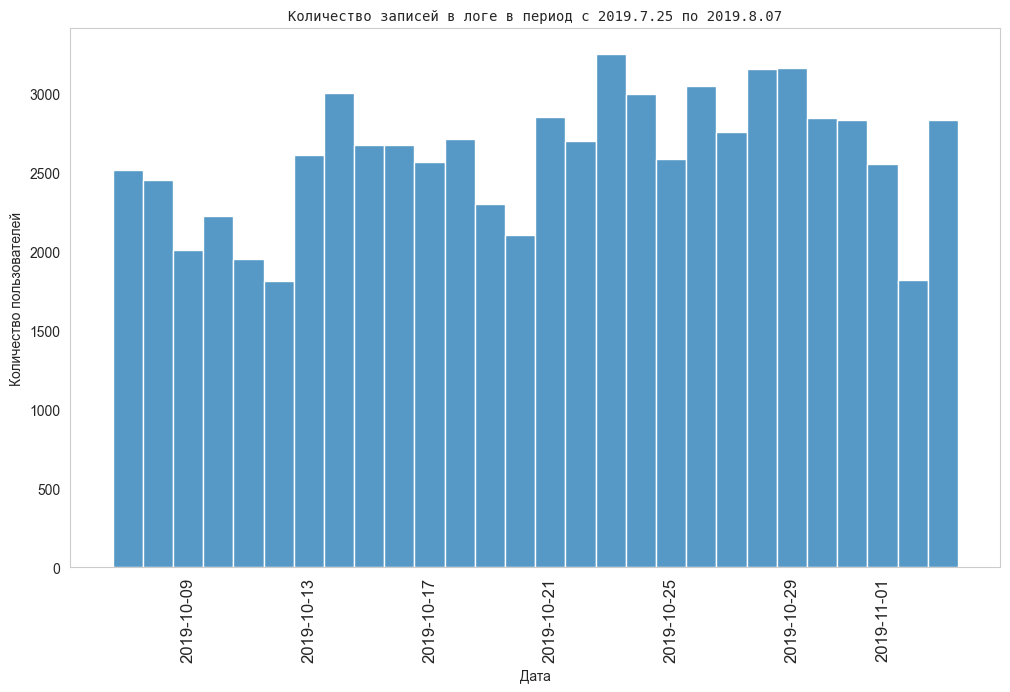

In [32]:
#Построим гистограммму, на которой отражего количество записей в логе в период с 2019.7.25 по 2019.8.07
fig, ax = plt.subplots()
ax.grid()
sns.histplot(x=logs['event_time'].dt.date)
ax.set_xlabel('Дата')
ax.set_ylabel('Количество пользователей')

fig.set_figwidth(12)
fig.set_figheight(7)
# #Добавляем заголовок графику
ax.set_title('Количество записей в логе в период с 2019.7.25 по 2019.8.07',
                fontfamily = 'monospace',
                fontstyle = 'normal',
                fontsize = 10)
                
plt.xticks(fontsize = 12, rotation=90)


На графике видно, что на всем временном диапозоне не было критических провалов, значит запись логов велась корректно на протяжении всего изучаемого периода датасета.

Также видна небольшая тенденция роста количества пользователей.


### Изучение пользовательских действий

In [33]:
# Создадим сводную таблицу по действиям
pivot_event = (logs
               .groupby('event_name', as_index=False)['user_id']
               .count()
               .sort_values(by='user_id', ascending=False)
               .rename(columns={'user_id': 'cnt_of_event'})
               .reset_index(drop=True))

pivot_event['per_of_event (%)'] = round(pivot_event['cnt_of_event'] / pivot_event['cnt_of_event'].sum() * 100 , 2) 
pivot_event

,event_name,cnt_of_event,per_of_event (%)
0,tips_show,39907,54.63
1,photos_show,9352,12.80
2,search,6765,9.26
3,advert_open,6146,8.41
4,contacts_show,4376,5.99
5,map,3749,5.13
6,favorites_add,1414,1.94
7,tips_click,811,1.11
8,contacts_call,534,0.73


Пользовательские события по количеству:
- `tips_show` — пользователь увидел рекомендованные объявления - `39907 (54.63%)`
- `photos_show` — просмотр фотографий в объявлении - `9352 (12.80%)`
- `search_1` — `search_7` — пользователь выставил фильтр - `6765 (9.26%)`
- `advert_open` — открытие карточки объявления - `6146 (8.41%)`
- `contacts_show` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления - `4376 (5.99%)`
- `map` — пользователь открыл карту размещенных объявлений - `3749 (5.13%)`
- `favorites_add` — добавление объявления в избранное - `1414 (1.94%)`
- `tips_click` — пользователь кликнул по рекомендованному объявлению - `811 (1.11%)`
- `contacts_call` — пользователь позвонил по номеру телефона на карточке объявления - `534 (0.73%)`

Более 50 - ти процентов событий это показ пользователям рекомендованных объявлений.

Менее одного процента от всех пользовательских действий - это звонок продавцу через наше приложение.


### Пользовательские сессии

In [34]:
# Создадим датафрейм с нашими сессиями, зададим перерыв в 15 минут
# Если человек не заходил более 15 - ти минут -> сессия закончена
# Также сохраним в переменную logs_with_session логи, в которых есть id сессий
logs_with_session, sessions = get_sessions(logs, '15Min')
sessions

,user_id,source,session_id,start_session,end_session,session_duration
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,1,2019-10-07 13:39:45,2019-10-07 13:49:41,9.56
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2,2019-10-09 18:33:55,2019-10-09 18:42:22,8.27
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,3,2019-10-21 19:52:30,2019-10-21 20:07:30,15.00
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,4,2019-10-22 11:18:14,2019-10-22 11:30:52,12.38
4,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,5,2019-10-19 21:34:33,2019-10-19 21:59:54,25.21
...,...,...,...,...,...,...
11532,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,11533,2019-11-02 18:17:41,2019-11-02 18:17:41,0.00
11533,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,11534,2019-11-02 19:25:53,2019-11-02 19:30:50,4.57
11534,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,11535,2019-11-03 14:32:55,2019-11-03 14:48:44,15.49
11535,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,11536,2019-11-03 15:36:01,2019-11-03 15:51:57,15.56


В нашем приложении отсутсвует такой контент, который предполагает детальное и длительное изучение (видеоролики продолжительностью более 10 - 15 минут, большие тексты и т. д.), поэтому было решено выбрать тайм - аут в 15 минут. Меньше вряд ли получится, потому что пользователь вполне может изучать интересующее его объявление 10 - 15 минут или листать ленту с вариантами не проваливаясь при этом во внутрь объявления.

In [35]:
# Рассмотрим, в каких диапозонах лежат длительности наших сессий
sessions['session_duration'].describe()

count    11537.000000
mean         9.296689
std         14.152909
min          0.000000
25%          0.050000
50%          4.190000
75%         13.030000
max        233.390000
Name: session_duration, dtype: float64

- 25% - наших сессий являются нулевыми (или около нулевыми с длительности менее 5 секунд)
- Также 25% сессий длятся более 13-ти минут
- Максимальная длительность сессии составила - 233 минуты 39 секунд
- Медианное значение длительности сессии составляет 4 минуты 19 секунд
- С выбросами средняя длительность сессии составлять 9 с половиной минут

Далее, при помощи персентелей определим, что нам считать выбросами, после поделим сессии на группы по длительности.

In [36]:
# Посчитаем процент нулевых сессий, чтобы понять, считать ли их аномалиями или оставить
round(sessions[sessions['session_duration'] == 0]['user_id'].count() / sessions.shape[0] * 100, 2)

23.25

Нулевые сессии (или сессии с одним действием) составляют `23.25%` от всех сессий - это `больше 5-ти%`, соответсвенно, удалить мы их не можем, поэтому выделим их в отдельную группу по длительности (нулевые). Теперь рассмотрим события внутри нулевых сессий:

In [37]:
#Изучим нулевые сессии
(logs_with_session[logs_with_session['session_id']
                   .isin(list(sessions[sessions['session_duration'] == 0]['session_id']))]
                   .groupby('event_name')['user_id'].count().sort_values(ascending=False))

event_name
tips_show        1162
photos_show       659
search            435
contacts_show     179
map               130
advert_open        58
favorites_add      46
tips_click         17
contacts_call       1
Name: user_id, dtype: int64

Как мы видим, половина событий - это "пользователь увидел рекомендованные объявления", вероятнее всего, в таких сессиях пользователь просто открыл приложение и вышел, также есть и другие события, но их меньшинство, они могли попасть в нулевые сессии из - за погрешностей в нашем делении на сессии. Так что считать все нулевые сессии за технические сбои мы не можем - это полноценная группа сессий и на пользователей, которые совершали эти сессии, можно повлиять. Произведем выделение таких сессий в отдельную группу.

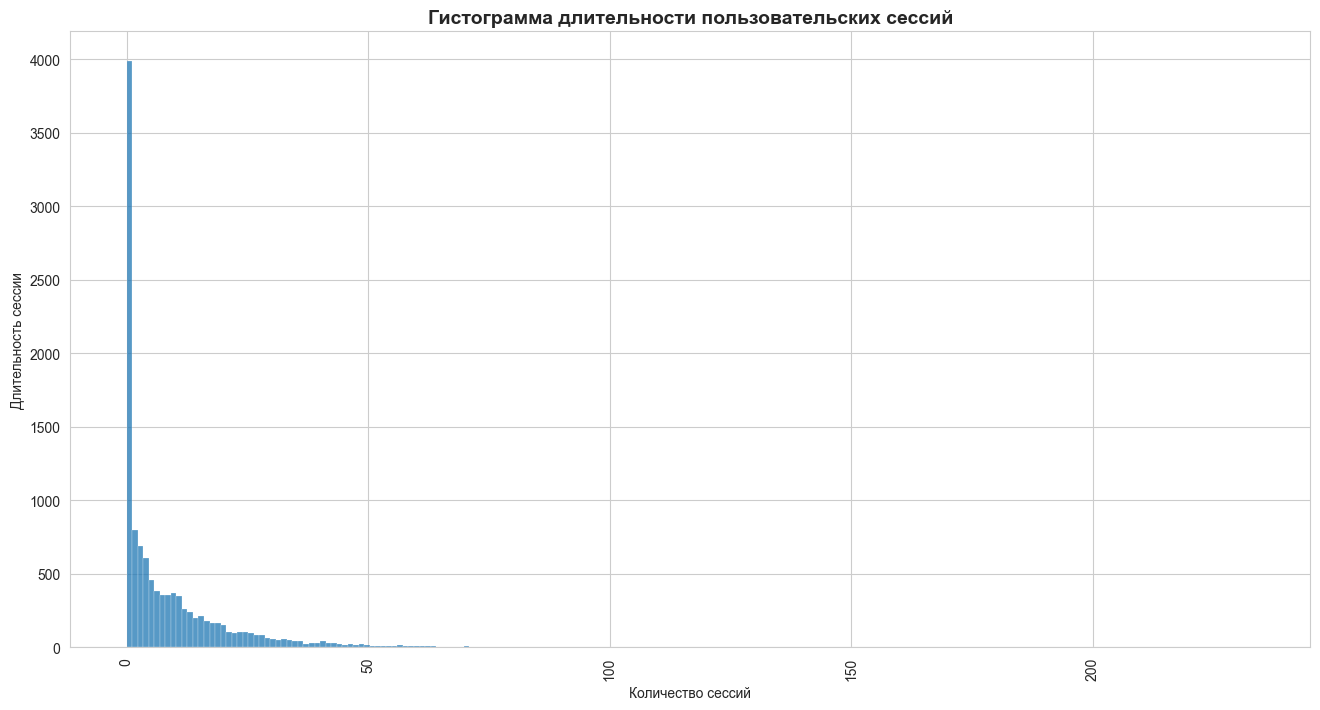

In [38]:
# Добавляем оси графика
fig, ax = plt.subplots()

# Добавляем гистограмму
ax = sns.histplot(x='session_duration',data=sessions)
plt.xticks(rotation = 90)
ax.set_title('Гистограмма длительности пользовательских сессий', fontweight="bold", fontsize=14)
ax.set_xlabel('Количество сессий')
ax.set_ylabel('Длительность сессии')


#Задаем ширину и высоту графику
fig.set_figheight(8) 
fig.set_figwidth(16)

- По графику видно, что подавляющая масса сессий по своей длительности не превышает 50 - ти минут
- Также очень много нулевых / около - нулевых сессий

Необходимо изучить, какие события совершают пользователи в нулевых сессиях

In [39]:
print(np.percentile(sessions['session_duration'], [95, 99])) 

[35.524  64.0292]


Не более 5% сессий длятся дольше, чем ~36 минут. И 1% сессий дляться дольше, чем ~64 минуты. Было бы логично отобрать сессии, длительность которых не превышает 36 минут (взять 36 за верхний порог и отсеять аномальных пользователей по ней).

In [40]:
#Удалим выбросы
sessions = sessions[sessions['session_duration'] <= 36]

In [41]:
# Рассмотрим, в каких диапозонах лежат длительности наших сессий после удаления выбросов
session_describe = sessions['session_duration'].describe()
session_describe

count    10964.000000
mean         6.929047
std          8.442616
min          0.000000
25%          0.020000
50%          3.430000
75%         11.152500
max         36.000000
Name: session_duration, dtype: float64

`В среднем пользователи приложения проводят в приложении около 7 - ми минут`

Выделим следующие группы на основании квартилей:
- Нулевые сессии (null) - длительность 0 секунд;
- Короткие сессии (short)- длительность от 0.02 включительно до 3.43 минут включительно;
- Обычные сессии (mean) - длительность от 3.43 до 11.15 минут включительно;
- Длинные сессии (long)- длительность от 11.15 минут.

In [42]:
# Напишем функцию для добавления типа сессии в датафрейм с сессиями
def type_session(value):
    
    if value == session_describe['min']:
        return 'null'
    elif session_describe['25%'] <= value <= session_describe['50%']:
        return 'short'
    elif session_describe['50%'] < value <= session_describe['75%']:
        return 'mean'
    elif session_describe['75%'] < value:
        return 'long'
    

In [43]:
# Создадим новый столбец в сессиях, применив нашу функцию к столбцу 'session_duration'
sessions['type_session'] = sessions['session_duration'].apply(type_session)
#Выведем первые 5 строк
sessions.head()

,user_id,source,session_id,start_session,end_session,session_duration,type_session
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,1,2019-10-07 13:39:45,2019-10-07 13:49:41,9.56,mean
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2,2019-10-09 18:33:55,2019-10-09 18:42:22,8.27,mean
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,3,2019-10-21 19:52:30,2019-10-21 20:07:30,15.00,long
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,4,2019-10-22 11:18:14,2019-10-22 11:30:52,12.38,long
4,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,5,2019-10-19 21:34:33,2019-10-19 21:59:54,25.21,long


In [44]:
#Составим сводную таблицу по типу сессий и их количеству
pivot_type_ses = (sessions
                  .groupby('type_session', as_index=False)['user_id']
                  .count().sort_values(by='user_id', ascending=False)
                  .rename(columns={'user_id': 'cnt_of_sessions'})
                  .reset_index(drop=True))
pivot_type_ses

,type_session,cnt_of_sessions
0,short,2759
1,long,2741
2,mean,2740
3,null,2682


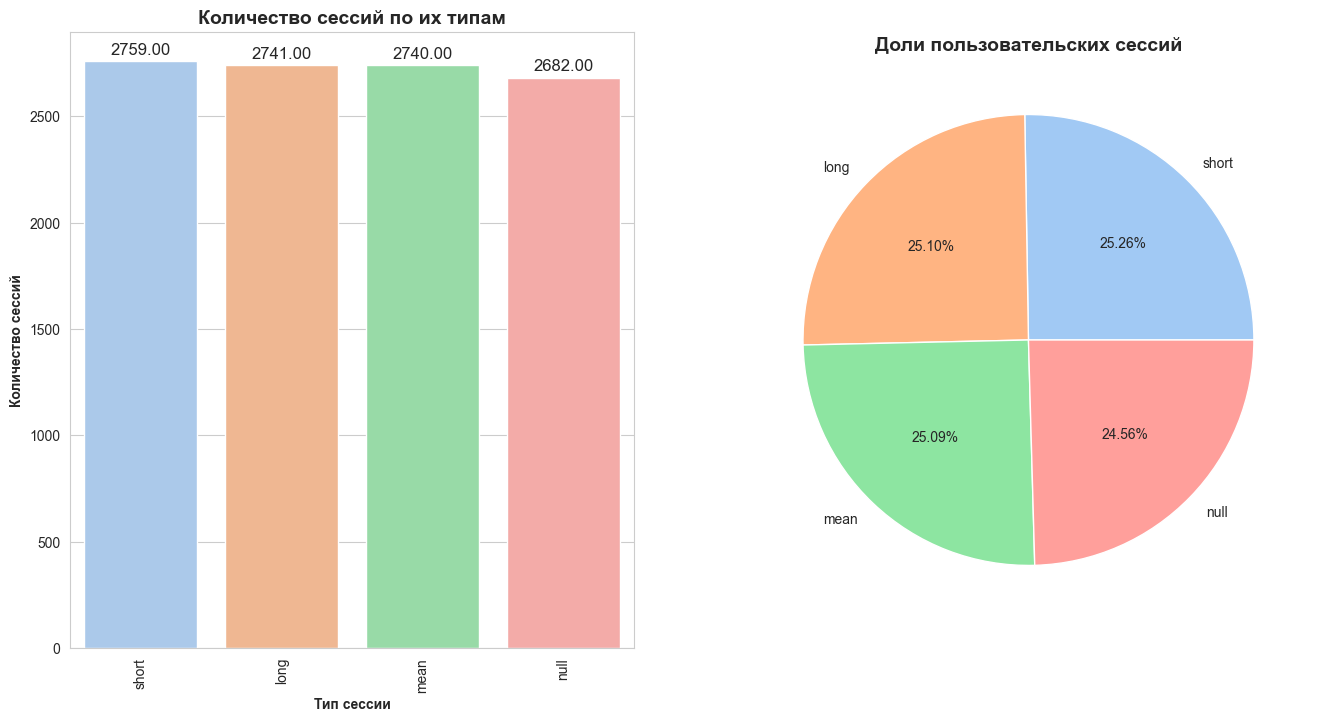

In [45]:
# Выведем диаграммы и посмотрим на распределение таких сессий
bar_pie_chart(pivot_type_ses,'type_session', 'cnt_of_sessions',
                xlabelbar='Тип сессии', ylabelbar='Количество сессий',
                display_value=True, pie_name='Доли пользовательских сессий',
                bar_name='Количество сессий по их типам')

Из - за того, что мы производили деление сессий по типу на основании квартилей, то они получились довольно равнораспределенными (около 25% каждая):

- short - `2759 (25.26%)`
- long - `2741 (25.10%)`
- mean - `2740 (25.09%)`
- null - `2682 (24.56%)`

Нулевыю сессии занимают долю практически в 1/4 (или же ,учитывая возможность особенностей деления на сессии логов, ~1/2). Это означает то, что с этой группой необходимо будет поработать, возможно, все не так плохо, когда мы посмотрим на медианное значений длительности сессий пользователей.

Интересная особенность того, что длинных сессий оказалось больше всего, стоит также посмотреть на медианные значения по пользователям.

In [46]:
#Составим сводную таблицу для изучения времени, которое пользователи проводят в приложении
# Возьмем медианное значение, потому что так мы сможем более точно выявить пользователей,
# скачавших наше приложение, но не пользующихся им (нулевых пользователей при расчете медианы будет больше , чем при расчете средней)
avg_ses_dur = sessions.groupby('user_id', as_index=False)['session_duration'].median()
#По тем же критериям что и для сессий расставим тип сессий пользователей
# Так мы выясним, к какой категории относить пользователя
avg_ses_dur['type_session'] = avg_ses_dur['session_duration'].apply(type_session)
avg_ses_dur = avg_ses_dur.rename(columns={'type_session': 'user_type', 'session_duration' : 'medan_us_time'})
# Выведем первые 5 строк 
avg_ses_dur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4148 entries, 0 to 4147
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        4148 non-null   object 
 1   medan_us_time  4148 non-null   float64
 2   user_type      4138 non-null   object 
dtypes: float64(1), object(2)
memory usage: 97.3+ KB


In [47]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     4293 non-null   object        
 1   first_ts    4293 non-null   datetime64[ns]
 2   event_name  4293 non-null   object        
 3   source      4293 non-null   object        
 4   dt          4293 non-null   object        
 5   month       4293 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 201.4+ KB


In [48]:
# Составим сводную таблицу по типу пользователя и их количеству
avg_ses_dur_pivot = (avg_ses_dur
                  .groupby('user_type', as_index=False)['user_id']
                  .count().sort_values(by='user_id', ascending=False)
                  .rename(columns={'user_id': 'cnt_users', })
                  .reset_index(drop=True))

avg_ses_dur_pivot

,user_type,cnt_users
0,mean,1522
1,short,1180
2,long,1111
3,null,325


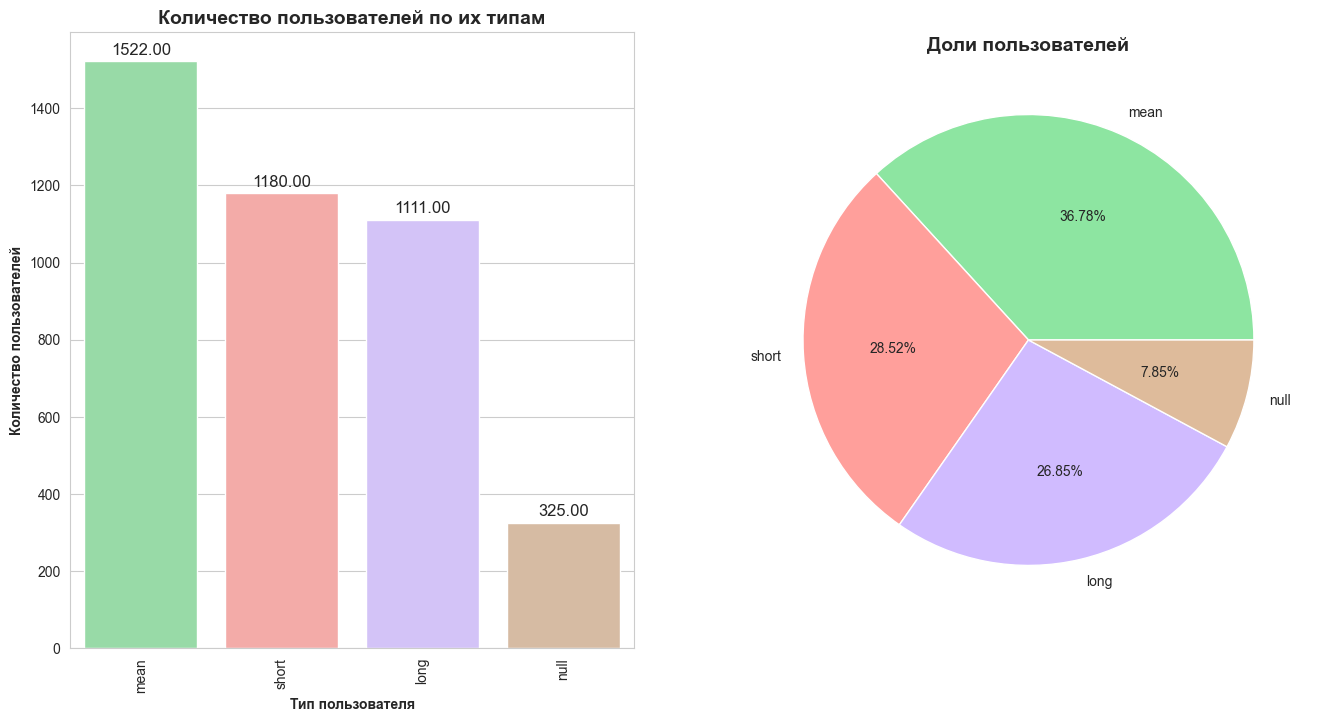

In [49]:
bar_pie_chart(avg_ses_dur_pivot,'user_type', 'cnt_users', colors=sns.color_palette('pastel')[2:7],
                xlabelbar='Тип пользователя', ylabelbar='Количество пользователей',
                display_value=True, pie_name='Доли пользователей',
                bar_name='Количество пользователей по их типам')

Теперь распределение групп больше похоже на правду - больше всего средних пользователей, меньше всего нулевых:

- mean - `1522 (36.78%)`
- short - `1180 (28.52%)`
- long - `1111 (26.85%)`
- null - `299 (7.85%)`

Радует то, что длинных сессий не на много меньше, чем коротких - `1.67%`

**Вывод по делению групп пользователоей, которые различаются по времени, проведенном в приложении.**

Было выделено 4 группы пользователей, различающихся по времени, проведённом в приложении:
- mean - `1522 (36.78%)`
- short - `1180 (28.52%)`
- long - `1111 (26.85%)`
- null - `299 (7.85%)`

Группы пользователей были выделенны следующим образом
- `null` - длительность 0 секунд;
- `short`- длительность от 0.02 включительно до 3.43 минут включительно;
- `mean` - длительность от 3.43 до 11.15 минут включительно;
- `long`- длительность от 11.15 минут.

**`В среднем пользователи приложения проводят в приложении около 7 - ми минут`**

*Нулевые сессии (или сессии с одним действием) составляют `23.25%` от всех сессий - это `больше 5-ти%`.*

Рекомендации по нулевым пользователям и тем, кто относится к группе `short`: таким пользователям стоит отправлять больше пуш уведомлений по типу:
- Похоже вы не определились с выбором...
- Покупатель ждет вашего звонка...
- Посмотрите также...

----------------------------

### Расчет Retention Rate

### Когорты по дате

Для начала изучим удержание пользователей за 14 дней, изучим их поведение за 2 недели и посмотрим, как они возвращаются, сильно ли падает коэффициент удержания и сохраняется ли уровень вовлеченности в приложение на каком - то определенном уровне.

In [50]:
# Зададим горизонт анализа
horizon_days = 14
# Зададим момент анализа
observation_date = profiles['dt'].max()

# Сохраним результаты функции
raw_retention, retention = get_retention(profiles, sessions, observation_date, horizon_days, ignore_horizon=False, dimensions = [])
#Выведем таблицу
retention

lifetime,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,
2019-10-07,191.0,1.0,0.125654,0.094241,0.115183,0.052356,0.036649,0.062827,0.083770,0.057592,0.041885,0.047120,0.031414,0.026178,0.062827
2019-10-08,161.0,1.0,0.167702,0.124224,0.055901,0.043478,0.068323,0.055901,0.074534,0.062112,0.043478,0.062112,0.024845,0.024845,0.031056
2019-10-09,173.0,1.0,0.069364,0.063584,0.057803,0.069364,0.069364,0.057803,0.075145,0.057803,0.028902,0.023121,0.028902,0.028902,0.057803
2019-10-10,167.0,1.0,0.083832,0.107784,0.083832,0.095808,0.083832,0.071856,0.053892,0.077844,0.035928,0.035928,0.053892,0.047904,0.041916
2019-10-11,132.0,1.0,0.090909,0.121212,0.098485,0.090909,0.075758,0.068182,0.045455,0.015152,0.045455,0.030303,0.037879,0.053030,0.030303
2019-10-12,116.0,1.0,0.137931,0.172414,0.060345,0.068966,0.094828,0.086207,0.094828,0.086207,0.068966,0.068966,0.043103,0.077586,0.043103
2019-10-13,136.0,1.0,0.132353,0.073529,0.058824,0.073529,0.058824,0.058824,0.051471,0.051471,0.051471,0.044118,0.036765,0.051471,0.051471
2019-10-14,176.0,1.0,0.119318,0.102273,0.102273,0.079545,0.062500,0.051136,0.045455,0.079545,0.034091,0.039773,0.051136,0.017045,0.062500
2019-10-15,178.0,1.0,0.146067,0.089888,0.078652,0.056180,0.050562,0.084270,0.078652,0.067416,0.022472,0.039326,0.039326,0.028090,0.039326


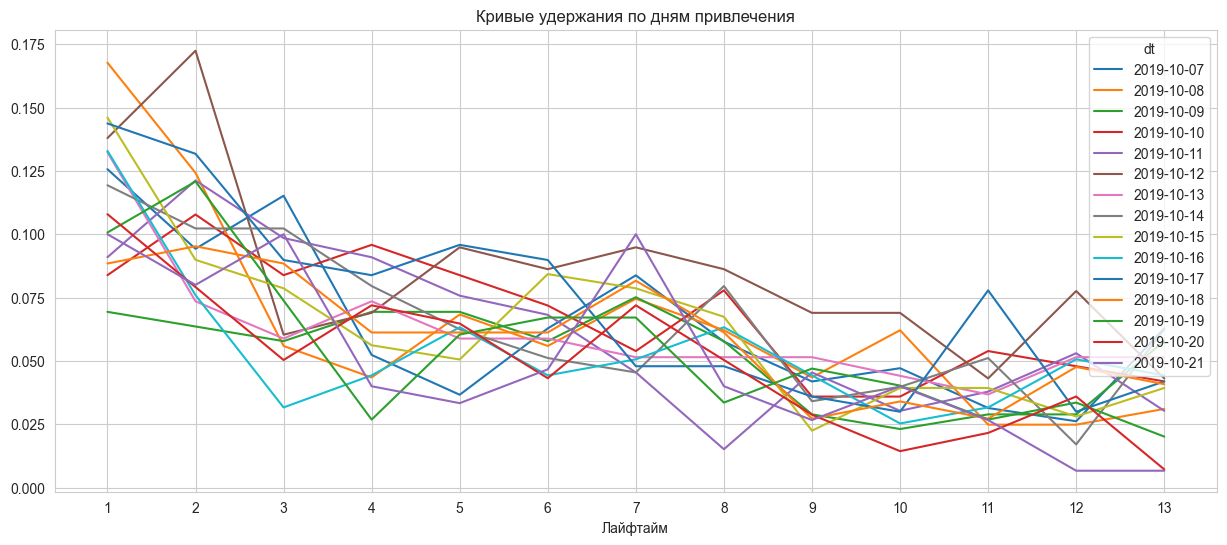

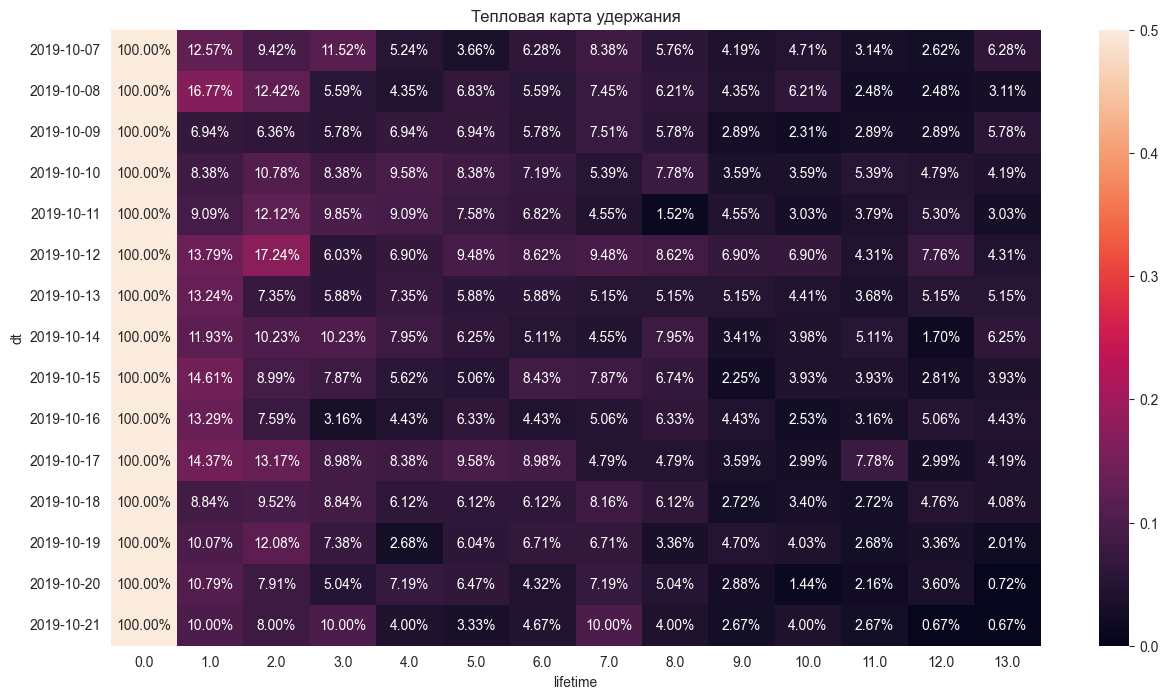

In [51]:
# Вызовем функцию для построения графиков
plot_retention(retention, vmin=0, vmax=0.5, title='Кривые удержания по дням привлечения')

- По графикам видно, что когорты не отличаются между собой и нету четкого роста или падения доли удержания с изменением даты привлечения пользователей;
- По линейной диаграмме а также хитмепу видно, что в нашем приложении retention rate не всегда находится в падении и с 8 - го дня начинает активно колебаться вверх и вниз - это означает что наши пользователи периодически возвращаются в наше приложение вновь, не забывая о нем;
- Первые 3 дня после установки приложения пользователи довольно активны, возможно стоит начинать отправлять пуш - уведомления пользователям на 4 день после установки приложения для повышения их удержания в нашем приложении.

In [52]:
# Изучим среднее значение retention rate для понимания поведения пользователей
# со временем привлечения
round(retention.drop(columns = ['cohort_size', 0]).mean(axis=1) * 100, 2)

dt
2019-10-07    6.44
2019-10-08    6.45
2019-10-09    5.29
2019-10-10    6.73
2019-10-11    6.18
2019-10-12    8.49
2019-10-13    6.11
2019-10-14    6.51
2019-10-15    6.31
2019-10-16    5.40
2019-10-17    7.28
2019-10-18    5.97
2019-10-19    5.52
2019-10-20    4.98
2019-10-21    4.97
dtype: float64

- Действительно, нету четкой тенденции к росту или падению удержания, пользователи, привлеченные в разные дни, ведут себя по разному
- Самый высокий средний показатель удержания в течении двух недель показала когорта, привлеченная `2019-10-12` - `8.49%`. Также у данной группы была замечена самая высокая доля удержания на 3 день после установки приложения - `17.24%`. Возможно, в дату этой когорты проводилась какая - то рекламная компания и стоит изучить ее более подробно.
- Самый низкий средний показатель удержания в течении двух недель показала когорта, привлеченная `2019-10-21` - `4.97%`

#### Когорты по источнику привлечения

In [53]:
# Сохраним результаты функции
raw_retention_source, retention_source = get_retention(profiles, sessions, observation_date, horizon_days, ignore_horizon=False, dimensions = ['source'])
# Выведем таблицу
retention_source

lifetime,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
source,,,,,,,,,,,,,,,
google,622,1.0,0.123794,0.091640,0.080386,0.056270,0.045016,0.072347,0.073955,0.056270,0.046624,0.043408,0.041801,0.041801,0.030547
other,659,1.0,0.103187,0.115326,0.071320,0.059181,0.081942,0.060698,0.057663,0.062215,0.033384,0.031866,0.036419,0.036419,0.053111
yandex,1059,1.0,0.120869,0.097262,0.079320,0.070822,0.065156,0.059490,0.070822,0.054769,0.035883,0.038716,0.035883,0.032106,0.036827


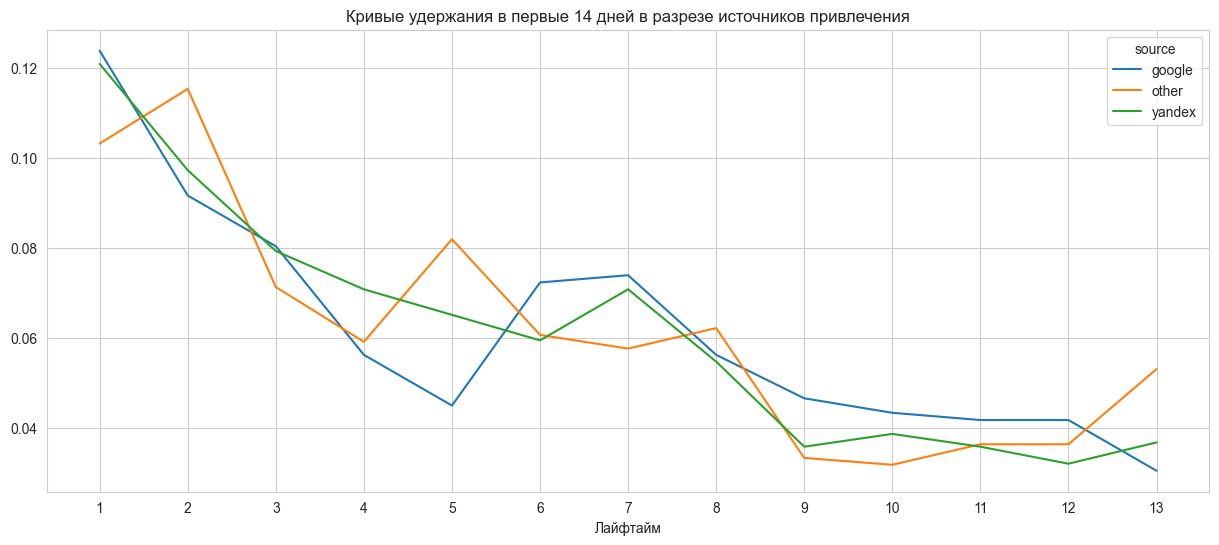

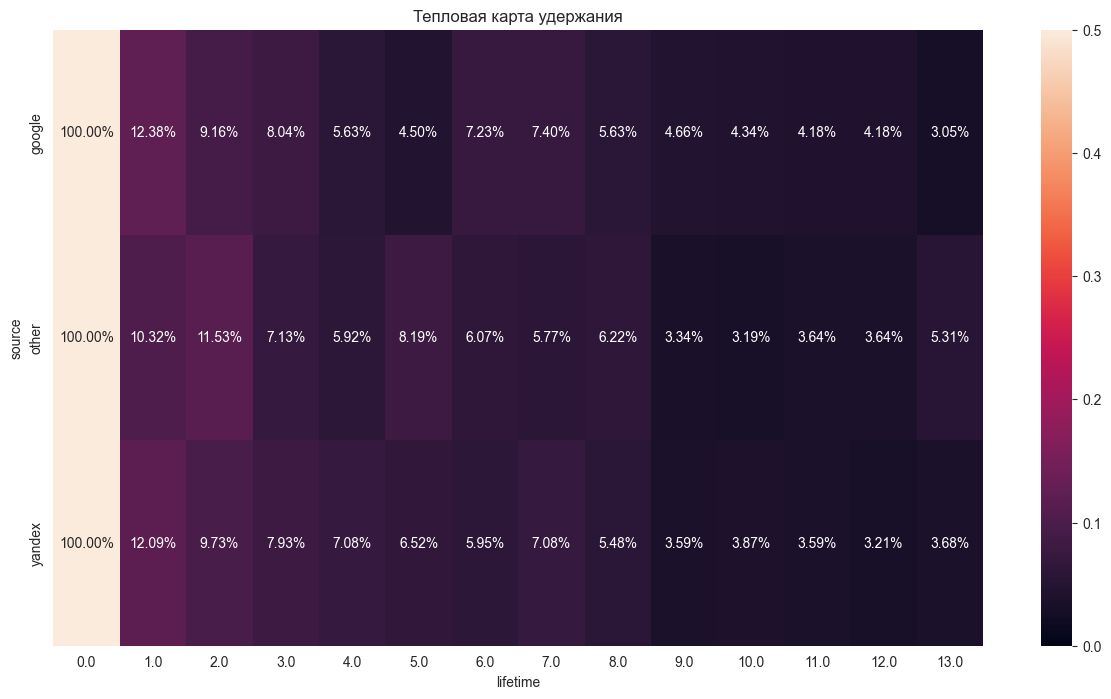

In [54]:
# Вызовем функцию для построения графиков
plot_retention(retention_source, vmin=0, vmax=0.5, title = 'Кривые удержания в первые 14 дней в разрезе источников привлечения')

- Картина довольна схожа - удержание по источниках похоже на удержание для дней привлечения;
- Также в первые 3 дня после установки приложения пользователи довольно активны;
- По линейной диаграмме а также хитмепу видно, что в нашем приложении retention rate с 8 - го дня начинает колебаться на уровне `3-4%`.


In [55]:
# Изучим среднее значение retention rate для понимания поведения пользователей
# в разрезе источника привлечения
round(retention_source.drop(columns = ['cohort_size', 0]).mean(axis=1) * 100, 2)

source
google    6.18
other     6.17
yandex    6.14
dtype: float64

In [56]:
# Посчитаем общее среднее удержания
round(round(retention_source.drop(columns = ['cohort_size', 0]).mean(axis=1) * 100, 2).mean(), 2)

6.16

Можно сказать, что между источниками практически нету отличий и среднее удержание находится на уровне `~6.16%`

**Вывод по делению групп пользователей, которые различаются по retention rate.**

Группы для сравнения retention rate были выделены по источникам:
- google - среднее значение retention rate на лайвтайме в 14 дней составляет `6.18`
- other - среднее значение retention rate на лайвтайме в 14 дней составляет `6.17`
- yandex - среднее значение retention rate на лайвтайме в 14 дней составляет `6.14`

Общие выводы:
- Нету четкого роста или падения доли удержания с изменением даты привлечения пользователей
- В нашем приложении retention rate не всегда находится в падении и с 8 - го дня начинает активно колебаться вверх и вниз на уровне `3-4%`- это означает что наши пользователи периодически возвращаются в наше приложение вновь, не забывая о нем.
- Первые 3 дня после установки приложения больше всего пользователей максимально активны по отношению ко всему лайвтайму
Пользователи, привлеченные в разные дни, ведут себя по разному
- Самый высокий средний показатель удержания в течении двух недель показала когорта, привлеченная `2019-10-12` - `8.49%`. Также у данной группы была замечена самая высокая доля удержания на 3 день после установки приложения - `17.24%`. 
- Самый низкий средний показатель удержания в течении двух недель показала когорта, привлеченная `2019-10-21` - `4.97%`

*Можно сказать, что между источниками, через которые пользователи скачали наше приложение, практически нету отличий и среднее удержание находится на уровне `~6.16%`*

Рекомендации:
- Возможно стоит начинать отправлять пуш - уведомления пользователям на 4 день после установки приложения для повышения их удержания в нашем приложении
- Проанализировать пользователей, рекламные компании и другие события, которые произошли с нашим приложением `2019-10-12`. Есть шанс выявить факторы, которые могут привести к повышению удержания пользователей.


---------------------------

### Выделение групп по частоте действий

#### В течение недели

Осуществим деление пользовательских логов по дню недели. Изучим количество кликов в каждый день недели и поймем, когда наши пользователи более всего и менее всего активны на неделе.

In [57]:
# Добавим в наш датафрейм логов столбец с днем недели события
logs_with_session['week_day'] = logs_with_session['event_time'].dt.weekday + 1
# Проверим
logs_with_session.head()

,event_time,event_name,user_id,source,session_id,week_day
792,2019-10-07 13:39:45,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,1,1
793,2019-10-07 13:40:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,1,1
796,2019-10-07 13:41:05,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,1,1
807,2019-10-07 13:43:20,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,1,1
816,2019-10-07 13:45:30,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,1,1


In [58]:
# Составим сводную таблицу по количеству кликов в разные дни недели
click_pivot = (logs_with_session
               .groupby('week_day', as_index=False)['event_name']
               .count().sort_values(by='week_day', ascending = False)
               .rename(columns={'event_name':'cnt_of_clicks'}))
# Переименуем цифры в названия дней недели
click_pivot['week_day'] = click_pivot['week_day'].replace({1: 'Понедельник', 2: 'Вторник', 3: 'Среда',
                                       4: 'Четверг', 5: 'Пятница', 6: 'Суббота',
                                       7: 'Воскресенье'})
# Выведем
click_pivot 

,week_day,cnt_of_clicks
6,Воскресенье,10311
5,Суббота,8989
4,Пятница,9809
3,Четверг,10618
2,Среда,10788
1,Вторник,10996
0,Понедельник,11543


Text(0.5, 1.0, 'Количество кликов в течение недели')

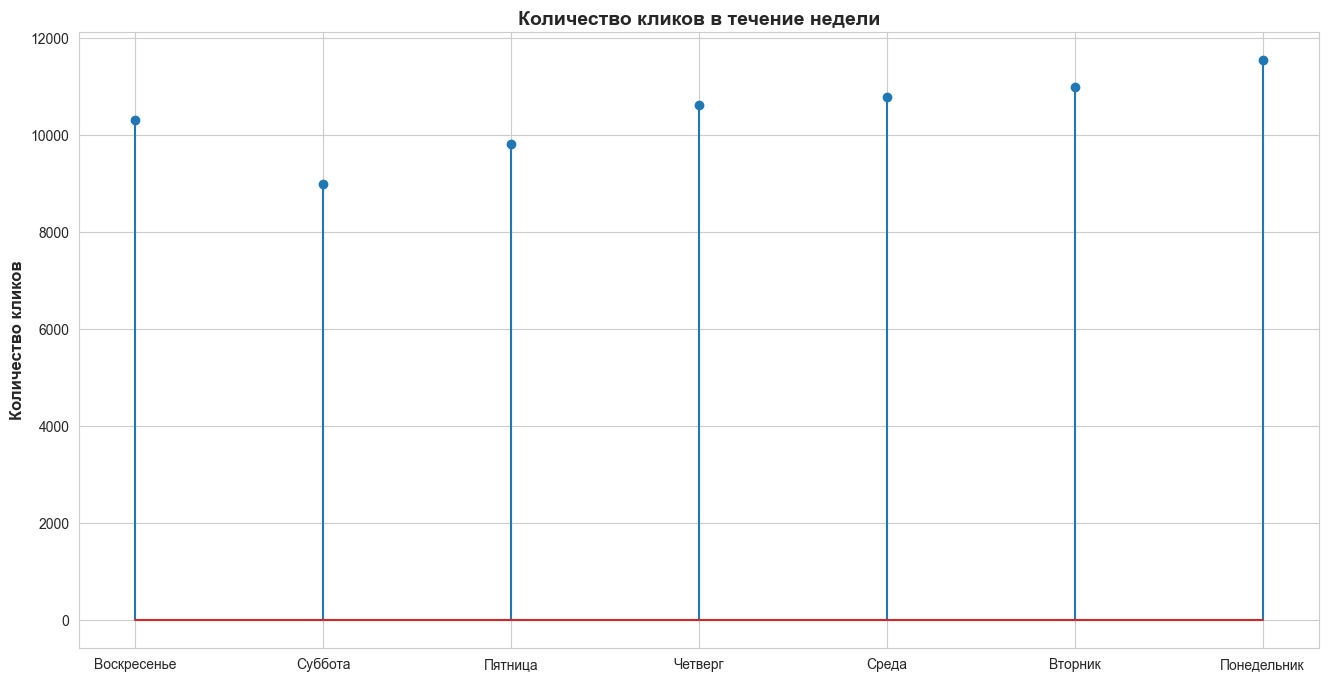

In [59]:
# Зададим размер графику
fig, ax = plt.subplots(figsize=(16, 8))
# Построим stem-диаграмму
ax.stem(click_pivot['week_day'], click_pivot['cnt_of_clicks'])
# Установим подпись на ось y
ax.set_ylabel('Количество кликов', fontsize=12, weight="bold")
# Установим заголовок
ax.set_title('Количество кликов в течение недели', fontsize=14, weight="bold")

- На графике видно, как в течение недели активность пользоватей плавно падает вплоть до пятницы, когда пятница наступает, то частота кликов значительно проседает, как и в субботу;
- Активность пользователей начинает восстанавливаться в воскресенье после отличных выходных.

#### По типу сессий

Осуществим деление пользовательских логов по времени суток, в которое пользователь совершал действия. Посмотрим, как различается количество кликов от времени суток. У нас будет 4 группы:
- ночная `(00:00 - 6:00)`
- утренняя `(6:00 - 12:00)`
- дневная `(12:00 - 18:00)`
- вечерняя `(18:00 - 00:00)`

In [60]:
# Зададим переменные, содержащие время
#Границы ночи
time_night_st= time(0,00,00)
time_night_end= time(6,00,00)
#Границы утра
time_morning_st= time(6,00,00)
time_morning_end= time(12,00,00)
#Границы дня
time_day_st= time(12,00,00)
time_day_end= time(18,00,00)
#Границы дня
time_evening_st= time(18,00,00)
time_evening_end= time(23,59,59)

In [61]:
#Напишем функцию, которая будем помечать сессию по времени суток

def day_night(value):
    # Ночь
    if  time_night_st <= value <= time_night_end:
        return 'night'
    #Утро
    elif time_morning_st < value <= time_morning_end:
        return 'morning'
    # День
    elif time_day_st < value <= time_day_end:
        return 'day'
    # Вечер
    elif time_evening_st < value <= time_evening_end: 
        return 'evening'

In [62]:
# Добавим в наши логи время события
logs_with_session['time_of_day'] = logs_with_session['event_time'].dt.time
# Добавим в наши логи часть дня, в которую произошло наше события
logs_with_session['part_of_day'] = logs_with_session['time_of_day'].apply(day_night)
# Добавим в наши логи дату события
logs_with_session['event_dt'] =  logs_with_session['event_time'].dt.date

In [63]:
# Выведем первые 5 строк
logs_with_session.head()

,event_time,event_name,user_id,source,session_id,week_day,time_of_day,part_of_day,event_dt
792,2019-10-07 13:39:45,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,1,1,13:39:45,day,2019-10-07
793,2019-10-07 13:40:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,1,1,13:40:31,day,2019-10-07
796,2019-10-07 13:41:05,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,1,1,13:41:05,day,2019-10-07
807,2019-10-07 13:43:20,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,1,1,13:43:20,day,2019-10-07
816,2019-10-07 13:45:30,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,1,1,13:45:30,day,2019-10-07


In [64]:
# Проверим логи на наличие пропусков
logs_with_session.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73054 entries, 792 to 71561
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   event_time   73054 non-null  datetime64[ns]
 1   event_name   73054 non-null  object        
 2   user_id      73054 non-null  object        
 3   source       73054 non-null  object        
 4   session_id   73054 non-null  int64         
 5   week_day     73054 non-null  int64         
 6   time_of_day  73054 non-null  object        
 7   part_of_day  73054 non-null  object        
 8   event_dt     73054 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 5.6+ MB


In [65]:
# Создадим сводную таблицу по части дня и количеству совершенных в это время кликов
click_part_day = logs_with_session.groupby('part_of_day', as_index=False)['user_id'].count().rename(columns={'user_id':'cnt_clicks'})
click_part_day

,part_of_day,cnt_clicks
0,day,30070
1,evening,25502
2,morning,13733
3,night,3749


In [66]:
# Поменяем местами части дня, чтобы порядок был как в жизни
indexes = {2: 0, 0: 1, 1: 2}
click_part_day = click_part_day.rename(indexes).sort_index()
click_part_day

,part_of_day,cnt_clicks
0,morning,13733
1,day,30070
2,evening,25502
3,night,3749


Text(0.5, 1.0, 'Количество кликов в течение дня')

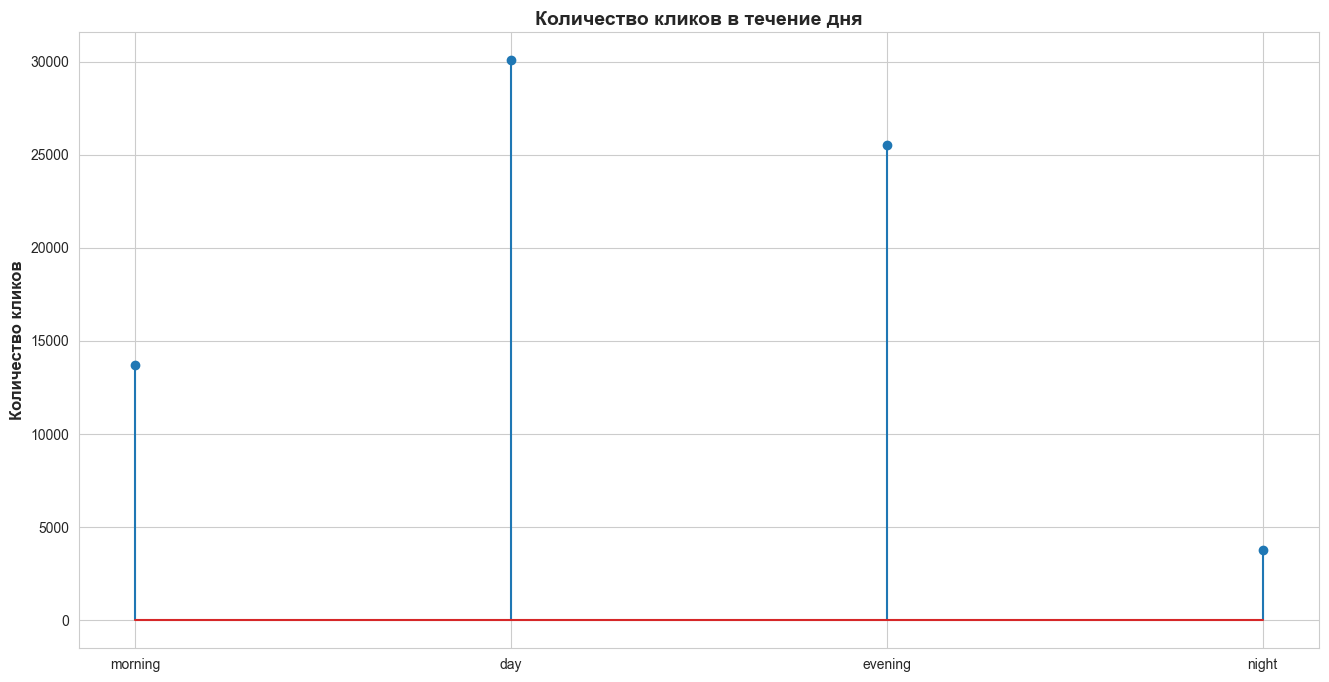

In [67]:
# Зададим размер графику
fig, ax = plt.subplots(figsize=(16, 8))
# Построим stem-диаграмму
ax.stem(click_part_day['part_of_day'] , click_part_day['cnt_clicks'])
# Установим подпись на ось y
ax.set_ylabel('Количество кликов', fontsize=12, weight="bold")
# Установим заголовок
ax.set_title('Количество кликов в течение дня', fontsize=14, weight="bold")

По всем логам, клики разделены следующим образом в течение дня:
- утром - `13733`
- днем - `30070`
- вечером - `25502`
- ночью - `3749`

Видно, что пользователи больше активны во второй и третей частях дня.

Проверим, совпадает ли эта картина с кликами в течении 28-ми дней.

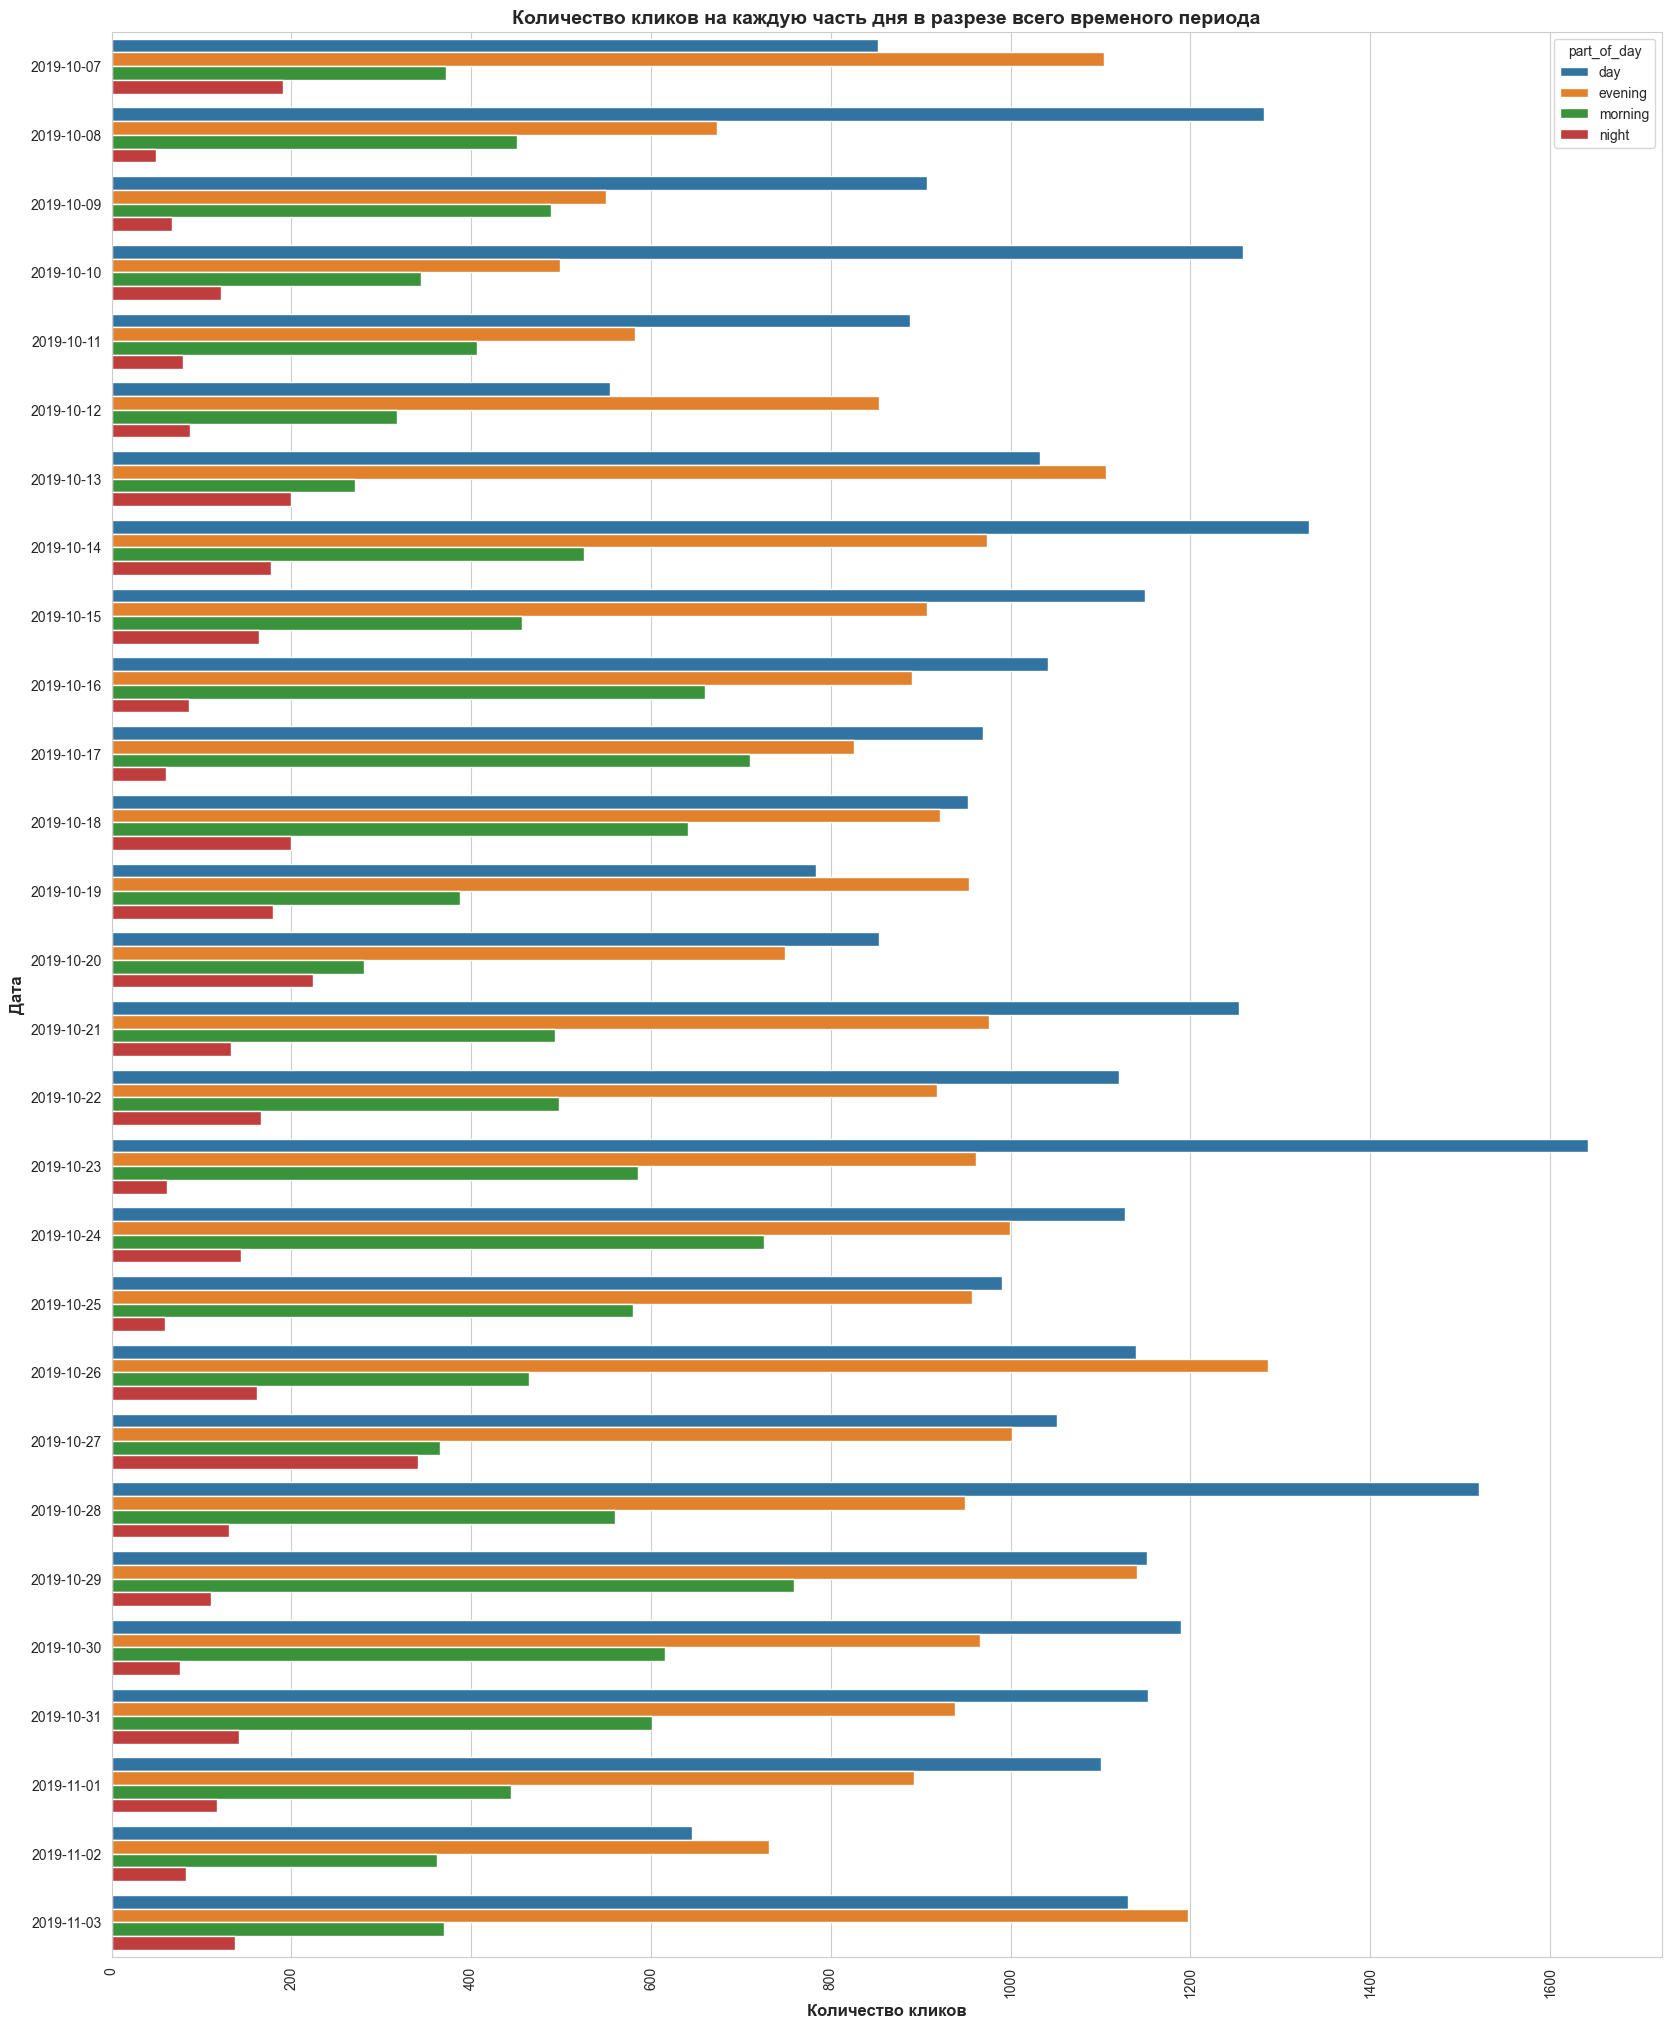

In [68]:
plt.figure(figsize=(20, 25))
ax = sns.countplot(y=logs_with_session['event_dt'].sort_values(), hue='part_of_day', data=logs_with_session)
ax.set_title('Количество кликов на каждую часть дня в разрезе всего временого периода', fontsize=14, fontweight="bold")
plt.xlabel('Количество кликов', fontsize=12, fontweight="bold")
plt.ylabel('Дата', fontsize=12, fontweight="bold")
plt.xticks(rotation = 90)
plt.show()

Действительно, почти каждый день больше всего кликов днем и вечером, а меньше всего утром и ночью, что весьма логично.

**Вывод по делению групп пользователей, которые различаются по частоте кликов.**

- Пользовательская активность показала что пиковая частота действий приходится на понедельник, а самая малая на субботу;
- Активность пользователей начинает восстанавливаться с воскресенья;
- Пользователи больше активны днем и вечером, ночью их активность минимальна и начинает повышаться к утру.
- Самый активный период деятельности пользователей в нашем приложении это понедельник днем, а самый неактивный период это ночь и утро субботы.

Было осуществлено деление пользовательских действий по времени суток. Выделили 4 группы:
- ночная `(00:00 - 6:00)` - `3749` кликов
- утренняя `(6:00 - 12:00)` - `13733` кликов
- дневная `(12:00 - 18:00)` - `30070` кликов
- вечерняя `(18:00 - 00:00)` - `25502` кликов

Также было осуществленно деление пользовательский действий по дню недели:
- Воскресенье	- `10311` кликов
- Суббота	- `8989` кликов
- Пятница	- `9809` кликов
- Четверг	- `10618` кликов
- Среда	- `10788` кликов
- Вторник	- `10996` кликов
- Понедельник	- `11543` кликов



Рекомендации:
- Из - за того, что количество кликов начинает падать вечером, можно осуществлять рассылку пользователям в это время, напомнить о приложении или том, что они не позвонили по номеру объявления, которое посмотрели, или отправить список рекомендованных объявлений и т.п.

-------------------------------

### Деление групп по конверсии в целевое действие

В нашем случае, целевое действие - это просмотр контактов.

In [69]:
# Зададим горизон анализа в 14 дней
analysis_horizon = 14 

# Создадим датасет, в котором присутсвуют только события contacts_show
show_cont_df = logs_with_session[logs_with_session['event_name']=='contacts_show']

# Получим сырые данные, таблицу конверсии и таблицу динамики конверсии
# Для начала изучим общую конверсию по пользователям
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    show_cont_df,
    observation_date,
    analysis_horizon
)

conversion

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,2457,0.170126,0.181522,0.189662,0.193732,0.198616,0.203907,0.207163,0.20757,0.209605,0.213675,0.216117,0.218559,0.219373,0.221001


Text(0, 0.5, 'Конверсия')

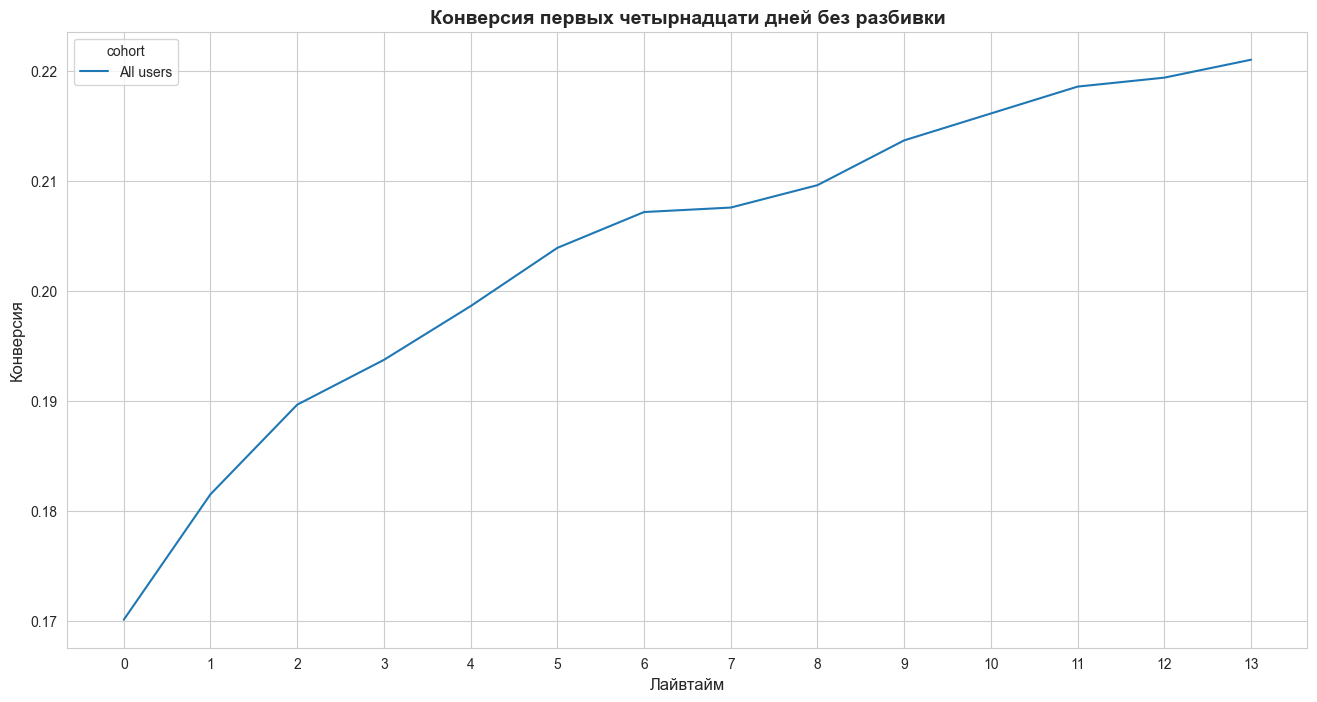

In [70]:
# Выведем линейний график конверсии по всем пользователем
# Удаляем колонку с размером когорты
report = conversion.drop(columns=['cohort_size'])
# Транспонируем таблицу
report.T.plot(
    grid=True, xticks=list(report.columns.values), figsize=(16,8)
)
# Заголовок
plt.title('Конверсия первых четырнадцати дней без разбивки', fontsize=14, fontweight="bold")
# Подпись оси X
plt.xlabel('Лайвтайм', fontsize=12)
# Подпись оси Y
plt.ylabel('Конверсия', fontsize=12)

По графику видно, что со дня привлечения конверсия постепенно и медленно, но растет.
На первый день она составляла `17%`, а на 14 день - `22%`.

Далее поделим наши когорты по источнику привлечния и посмотрим из какого источника пользователи лучше конвертируются в целевое действие.

In [71]:
# Получим сырые данные, таблицу конверсии и таблицу динамики конверсии
# Для начала изучим общую конверсию по пользователям
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    show_cont_df,
    observation_date,
    analysis_horizon,
    dimensions=['source']
)

conversion

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
source,,,,,,,,,,,,,,,
google,655,0.180153,0.189313,0.193893,0.196947,0.204580,0.206107,0.209160,0.210687,0.212214,0.215267,0.218321,0.221374,0.222901,0.224427
other,688,0.130814,0.140988,0.154070,0.158430,0.159884,0.164244,0.170058,0.170058,0.171512,0.178779,0.181686,0.184593,0.186047,0.188953
yandex,1114,0.188510,0.201975,0.209156,0.213645,0.219031,0.227110,0.228905,0.228905,0.231598,0.234291,0.236086,0.237882,0.237882,0.238779


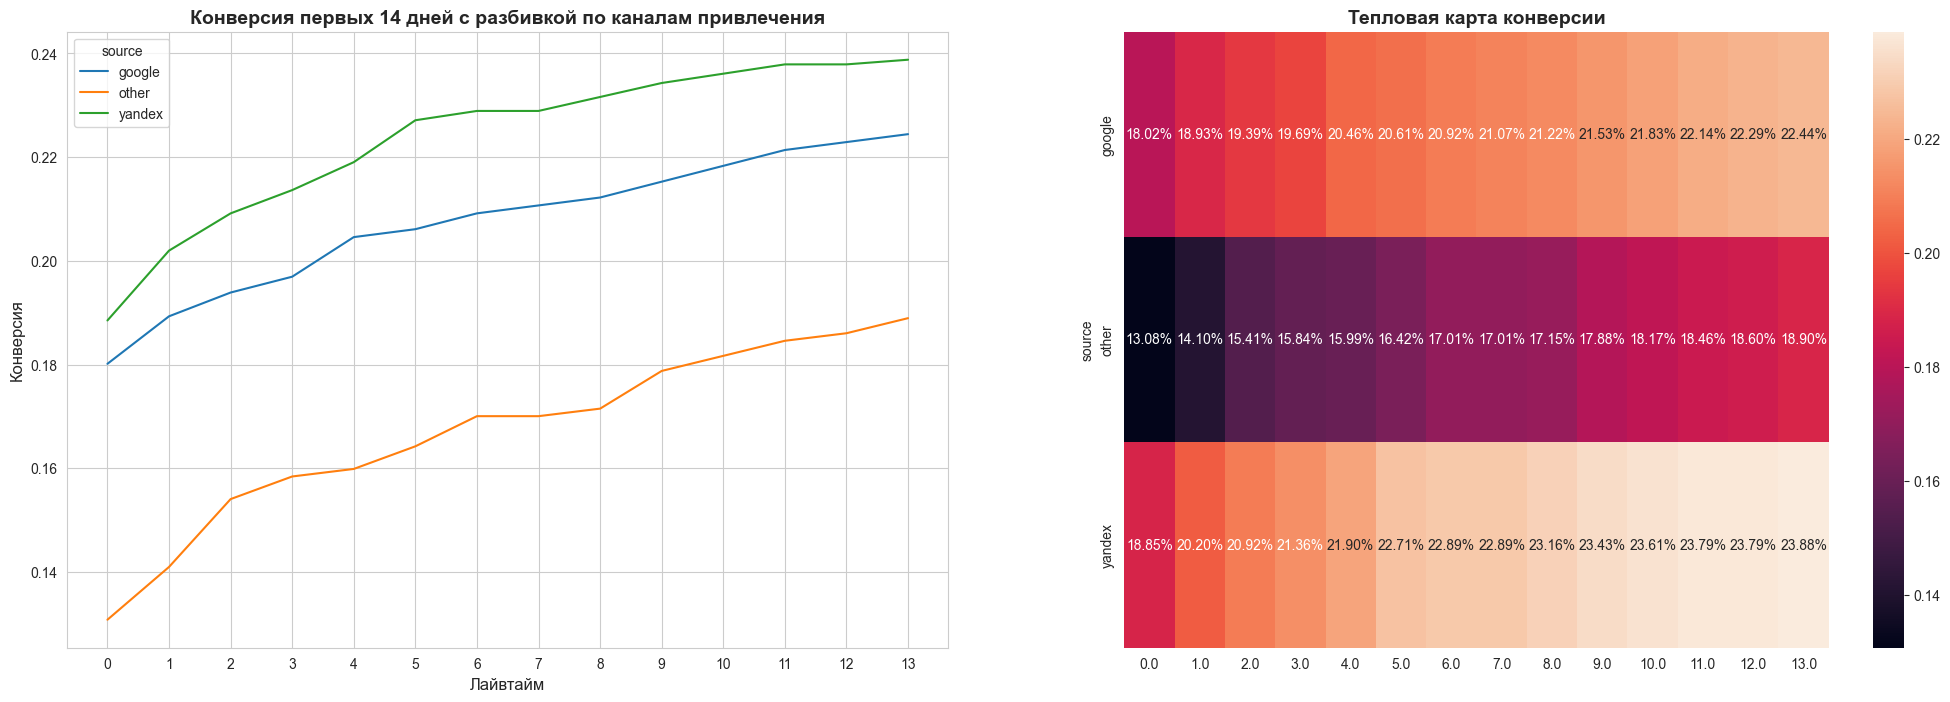

In [72]:
plot_conversion(conversion, title='Конверсия первых 14 дней с разбивкой по каналам привлечения')

- Аутсайдером по конверсии можно назвать источник привлечния `other`, он перешел отметку в 18% только на 10 день;
- Несомненно лидеры - это `yandex` и `google`, но пользователи из `google` конвертируются немнго хуже;
- Через `yandex` уже на 2 день конверсия превысила 20%, в то время как у `google` только на 5;
- С 9 дня конверсия сильно замедляется у всех источников.

**Вывод по делению групп пользователей, которые различаются по конверсии.**

Было решено осуществить деление на группы по источнику привлечения, сделаны следующие выводы:
- Аутсайдером по конверсии можно назвать источник привлечния `other`, он перешел отметку в 18% только на 10 день;
- Несомненно лидеры - это `yandex` и `google`, но пользователи из `google` конвертируются немнго хуже;
- С 9 дня конверсия сильно замедляется у всех источников.

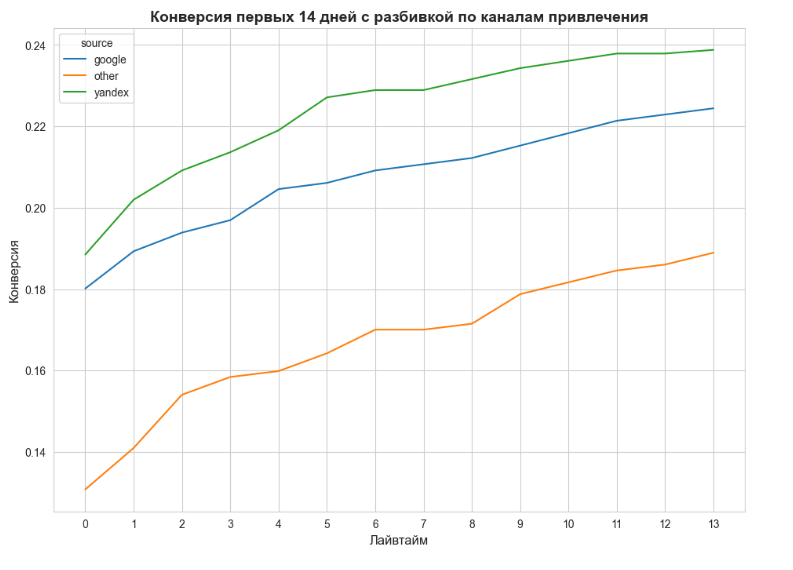

Рекомендации:
Если нам важна высокая конверсия не только у пользователей, пришедших с яндекса и гугла, то следует поработать/изменить подход к рекламной компании у источников, которые входят в группу `others`.

----------------------------------

## Сегментирование пользователей

<a id="segmentation"></a>
[Описание проекта](#introduction)

Сегментирование пользователей проведем по частоте пользования приложением в разное время суток и на основании этого изучим их поведение, посмотрим как различается удержание таких пользователей, а также их конверсия в целевое действие, то есть, какие пользователи чаще просматривают номер продавца в объявлении (например, вечерние или утренние).

Пользователей мы выделем на основе сессий, которым присвоим статус (утро, день, вечер, ночь). Посчитаем количество сессий каждого пользователя, выявим, когда чаще он был активен и, на основании этого, присвоим ему группу. Группу будем назначать по времени старта сессии.

**Чем полезно такое деление** - таким делением мы сможем выявить, когда наши пользователи активнее всего пользуются нашим приложением и проявляют максимальную вовлеченность в него, за счет выделения такого "целевого сегмента" мы сможем работать над другими - менее продуктивными сегментами. Таким образом, в перспективе мы сможем повысить показатели конверсии и удержания, а также увеличить количество пользователей.

**Предполагаемые результаты:**
- 4 группы пользователей (утро, день, вечер ночь);
- ночная группа будет самой малочисленной;
- дневная группа будет самой большой;
- дневные пользователи самые конвертирующиеся;
- чаще всего в приложение возвращаются вечерние пользователи;
- самый малый retention rate будет у утренних и ночных пользователей.

Если случилось так, что у пользователя одинаковое количество событий в двух частях суток, то порядок приоритета по убыванию следующий:
- day
- evening
- morning
- night

In [73]:
# Добавим в наши сессии столбец с временем начала сессии
sessions['time_of_start_session'] = sessions['start_session'].dt.time
sessions['group'] = sessions['time_of_start_session'].apply(day_night)

In [74]:
# Выведем полученный датасет
sessions.head()

,user_id,source,session_id,start_session,end_session,session_duration,type_session,time_of_start_session,group
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,1,2019-10-07 13:39:45,2019-10-07 13:49:41,9.56,mean,13:39:45,day
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2,2019-10-09 18:33:55,2019-10-09 18:42:22,8.27,mean,18:33:55,evening
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,3,2019-10-21 19:52:30,2019-10-21 20:07:30,15.00,long,19:52:30,evening
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,4,2019-10-22 11:18:14,2019-10-22 11:30:52,12.38,long,11:18:14,morning
4,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,5,2019-10-19 21:34:33,2019-10-19 21:59:54,25.21,long,21:34:33,evening


In [75]:
# Составим сводную таблицу, посчитаем для каждого пользователя количество
# сессий в разное время суток
seg_pivot = (sessions
             .pivot_table(index=['user_id', 'group'], values='type_session', aggfunc='count')
             .rename(columns={'type_session': 'cnt_of_sessions'})
             .sort_values(by=['user_id', 'cnt_of_sessions'], ascending=[False, False]))

In [76]:
# Выведем первые 10 строк для ознакомления
seg_pivot.head(10)

cnt_of_sessions
user_id                              group                   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b day                   19
                                     evening                9
                                     night                  4
                                     morning                3
ffe68f10-e48e-470e-be9b-eeb93128ff1a day                    2
                                     morning                1
ffcf50d9-293c-4254-8243-4890b030b238 morning                1
ffc01466-fdb1-4460-ae94-e800f52eb136 evening                1
ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07 day                    1
                                     evening                1

In [77]:
# Для более удобной работы создадим столбец,
# который является копией 2 уровня индексов 
seg_pivot['group'] = seg_pivot.index.get_level_values('group')

In [78]:
# Выявим для каждого пользователя его группу
segment_profiles = seg_pivot.pivot_table(index='user_id', values=['cnt_of_sessions', 'group'], aggfunc='first')

In [79]:
# Изучим
segment_profiles.head()

,cnt_of_sessions,group
user_id,,
0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,evening
00157779-810c-4498-9e05-a1e9e3cedf93,4,evening
00463033-5717-4bf1-91b4-09183923b9df,1,day
004690c3-5a84-4bb7-a8af-e0c8f8fca64e,7,evening
00551e79-152e-4441-9cf7-565d7eb04090,2,day


In [80]:
# Добавим в пользовательские профили их группу и количество сессий
# проведенное в этой группе
# Удалим пропуски, которые возникли при очистке выбросов аномально больших сессий, небольшой процент пользователей отсекся
segment_profiles = profiles.merge(segment_profiles, how='left', on='user_id').dropna(axis=0)

In [81]:
# Изучим итоговые полученные профили
segment_profiles.head()

,user_id,first_ts,event_name,source,dt,month,cnt_of_sessions,group
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45,tips_show,other,2019-10-07,2019-10-01,2.0,evening
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33,search,yandex,2019-10-19,2019-10-01,4.0,evening
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35,photos_show,yandex,2019-11-01,2019-11-01,1.0,day
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:05,search,google,2019-10-18,2019-10-01,7.0,evening
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41,contacts_show,yandex,2019-10-25,2019-10-01,2.0,day


In [82]:
# Посчитаем количество пользователей в каждой группе
segment_profiles.groupby('group', as_index=False)['user_id'].count()

,group,user_id
0,day,1906
1,evening,1424
2,morning,679
3,night,139


При таком делении наши пользователи не пересекаются в группах

Удалим группу night, изменим этих пользователей на утренних. Сделаем это по трем причинах:
- Ночная группа составляет менее 10% от самой большой (утренней) группы;
- Хотелось бы проанализировать всех уникальных пользователей, присутсвующих в датасете (не можем удалить их);
- Из анализа выше было выявленно, что сессии утренние и ночные схожи по конверсии и удержанию, а также являются самыми близкими по количеству частоте действий в приложении.

In [83]:
# Меняем night на morning
segment_profiles['group'] = segment_profiles['group'].replace({'night': 'morning'})

In [84]:
# Еще раз считаем количество пользователей в каждой группе
group_pivot = segment_profiles.groupby('group', as_index=False)['user_id'].count().rename(columns={'user_id': 'cnt_of_users'})
#Добавим столбец с долей сегмента
group_pivot['share_of_users'] = round(group_pivot['cnt_of_users'] / group_pivot['cnt_of_users'].sum(), 2)
group_pivot

,group,cnt_of_users,share_of_users
0,day,1906,0.46
1,evening,1424,0.34
2,morning,818,0.20


Доли пользователей распределены по сегментам следующим образом:
- day (дневные) - `1906 (46%)`
- evening (вечерние) - `1424 (34%)`
- morning (утренние) - `818 (20%)`

Основная часть наших пользователей, а именно - 80% проявляют пользуются приложением в промежутке между `12:00 - 00:00` (вторая половина суток)

### Конверсия по сегментам

In [85]:
# Получим сырые данные, таблицу конверсии и таблицу динамики конверсии
# Для начала изучим общую конверсию по пользователям
group_conversion_raw, group_conversion, group_conversion_history = get_conversion(
    segment_profiles,
    show_cont_df,
    observation_date,
    analysis_horizon,
    dimensions=['group']
)

group_conversion

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
group,,,,,,,,,,,,,,,
day,1111,0.193519,0.203420,0.210621,0.215122,0.222322,0.229523,0.235824,0.236724,0.240324,0.246625,0.249325,0.252025,0.252025,0.253825
evening,809,0.149567,0.160692,0.171817,0.175525,0.180470,0.184178,0.184178,0.184178,0.185414,0.187886,0.189122,0.191595,0.192831,0.194067
morning,452,0.143805,0.161504,0.168142,0.172566,0.172566,0.176991,0.179204,0.179204,0.179204,0.181416,0.185841,0.188053,0.190265,0.192478


In [86]:
# Создадим в таблице сегментов столбец со средней конверсией
group_pivot['avg_conversion'] = list(round(group_conversion.drop(columns=['cohort_size']).mean(axis=1), 3))
group_pivot

,group,cnt_of_users,share_of_users,avg_conversion
0,day,1906,0.46,0.232
1,evening,1424,0.34,0.181
2,morning,818,0.20,0.177


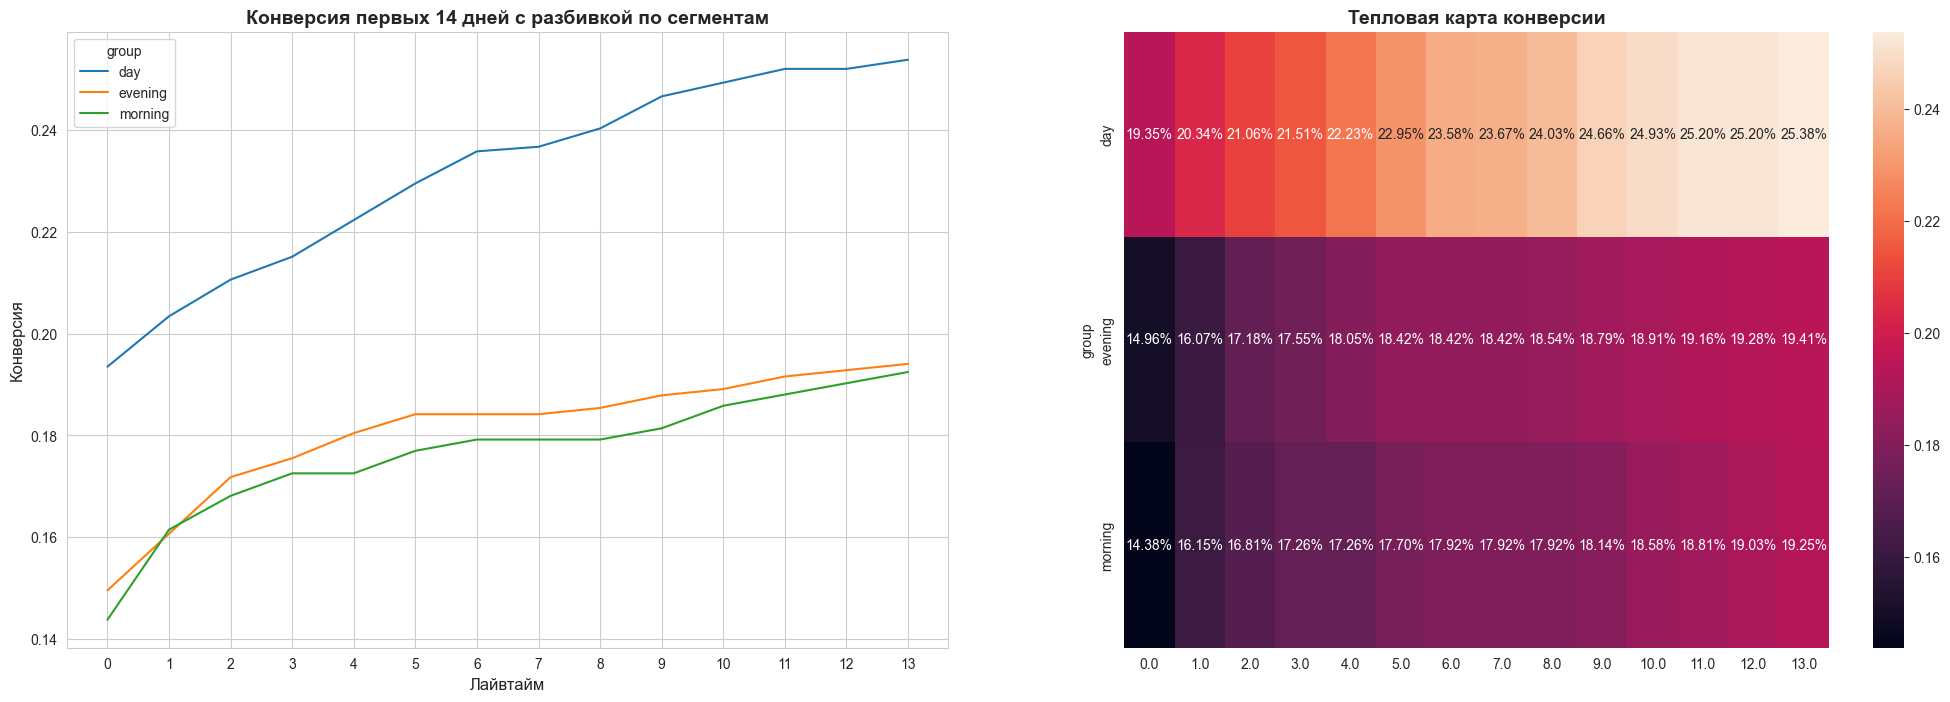

In [87]:
# Выведем кривые конверсии а также хитмеп
plot_conversion(group_conversion, title='Конверсия первых 14 дней с разбивкой по сегментам')

In [88]:
# В соответствии с группами изменим в логах ночь на утро
logs_for_conversion = logs_with_session.replace({'night': 'morning'})

In [89]:
# Посчитаем общую конверсию для каждого сегмента
general_conversion(logs_for_conversion, 'day')
general_conversion(logs_for_conversion, 'evening')
general_conversion(logs_for_conversion, 'morning')

Общая конверсия для сегмента day составляет 22.44%
Общая конверсия для сегмента evening составляет 18.52%
Общая конверсия для сегмента morning составляет 18.63%


Результаты довольно схожи со средними показателями, интересно то, что утренняя конверсия чуть больше (0.11%), чем вечерняя.

Размеры когорт на лайвтайме в 14 дней были следующими:
- day (дневные) - `1111`
- evening (вечерние) - `809`
- morning (утренние) - `452`

Промежуточные выводы:
- По графикам видно, что лучше всего конвертируются дневные пользователи, за 14 дней конверсия выросла с `19.3% до 25.3%` - прирост в `6%`. У вечерней и утренних групп такого роста конверсии не наблюдалось.
- Средняя конверсия по утренним и вечерним пользователем составляет примерно одинаковый процент в `~18%` 

### Удержание по сегментам

In [90]:
# Зададим горизонт анализа в 14 дней
horizon_days = 14
# Зададим момент анализа
observation_date = segment_profiles['dt'].max()

# Сохраним результаты функции
group_raw_retention, group_retention = get_retention(segment_profiles, sessions, observation_date, horizon_days, ignore_horizon=False, dimensions = ['group'])
#Выведем таблицу
group_retention

lifetime,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
group,,,,,,,,,,,,,,,
day,1098,1.0,0.107468,0.094718,0.085610,0.068306,0.071038,0.067395,0.075592,0.058288,0.042805,0.041894,0.036430,0.037341,0.041894
evening,794,1.0,0.148615,0.124685,0.086902,0.071788,0.062972,0.064232,0.075567,0.065491,0.037783,0.041562,0.045340,0.045340,0.041562
morning,448,1.0,0.082589,0.073661,0.040179,0.037946,0.051339,0.051339,0.035714,0.040179,0.026786,0.022321,0.026786,0.015625,0.031250


In [91]:
# В данном случае при нахождении среднего мы будем использовать медианное значение
# делаем это потому что первые дни удержания искажают общую картину, ведь нам важно удержание
# на дистанции
group_pivot['avg_retention'] = list(round(group_retention.drop(columns=['cohort_size', 0]).median(axis=1), 3))
group_pivot

,group,cnt_of_users,share_of_users,avg_conversion,avg_retention
0,day,1906,0.46,0.232,0.067
1,evening,1424,0.34,0.181,0.064
2,morning,818,0.20,0.177,0.038


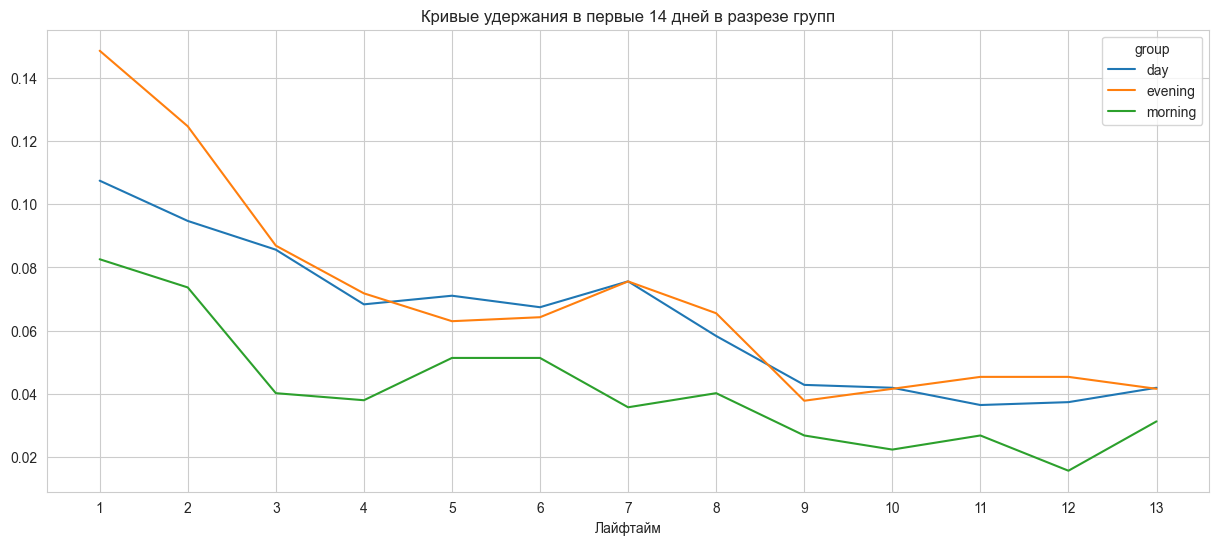

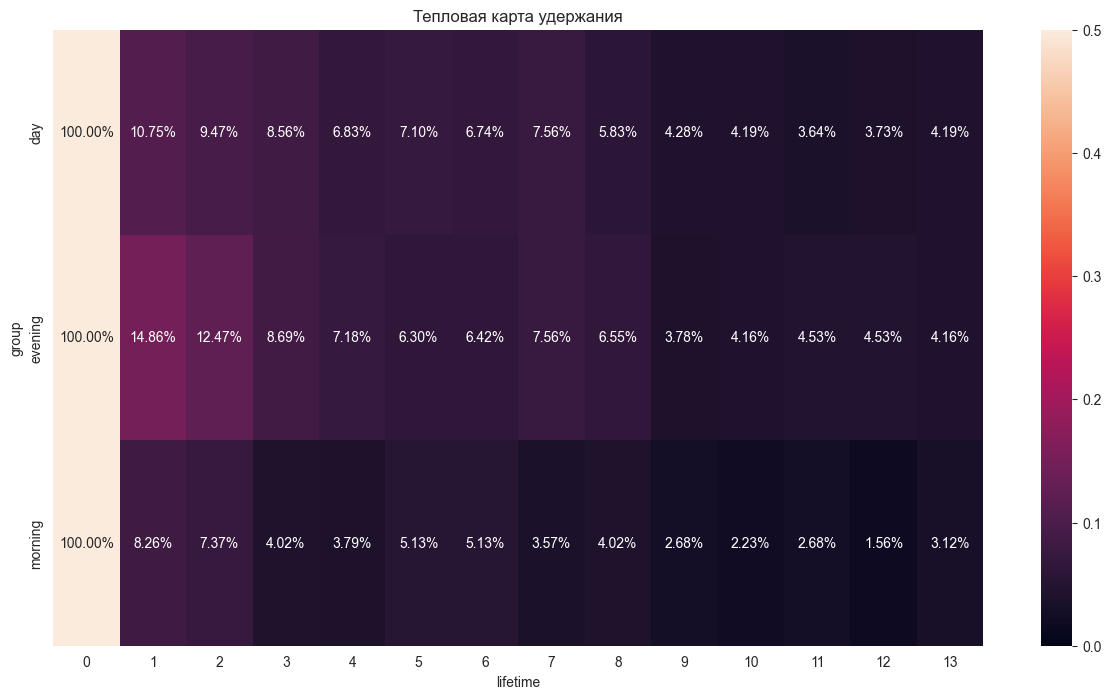

In [92]:
# Изучим удержание пользователей
plot_retention(group_retention, vmin=0, vmax=0.5, title = 'Кривые удержания в первые 14 дней в разрезе групп')

Промежуточные выводы:
- По графикам видно, что удержание вечерних и дневных пользователей со временем меняются практически одинаково, также их средние значения составили в `6%` и `7%` соответственно;
- Среднее удержание утренних пользователей составило 4% - это означает, что пользователи, которые чаще используют наше приложение утром, хуже возвращаются в него;
- Интересная особенность того, что на 2 и 3 дни лайвтайма лучше всего удерживались вечерние пользователи.

## Проверка статистических гипотез

<a id="hypotheses"></a>
[Описание проекта](#introduction)

Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. 

Нам необходимо проверить следующую гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.

- `Н_0: конверсия пользователей из yandex == конверсия пользователей из google` 
- `Н_а: конверсия пользователей из yandex != конверсия пользователей из google`

In [93]:
# Создадим датафрейм, в котором содержаться данные только по пользователям
#пришедших из яндекса
df_yandex = logs_with_session[logs_with_session['source'] == 'yandex']
# Всего уникальных пользователей
leads_yandex = df_yandex['user_id'].nunique()
# Всего уникальных пользователей, совершивших целевое действие
success_yandex = df_yandex[df_yandex['event_name'] == 'contacts_show']['user_id'].nunique()

In [94]:
# Создадим датафрейм, в котором содержаться данные только по пользователям
#пришедших из гугла
df_google = logs_with_session[logs_with_session['source'] == 'google']
# Всего уникальных пользователей
leads_google = df_google['user_id'].nunique()
# Всего уникальных пользователей, совершивших целевое действие
success_google = df_google[df_google['event_name'] == 'contacts_show']['user_id'].nunique()

In [95]:
#Проверим нашу гипотезу
z_test_hyp(success_google, success_yandex, leads_google, leads_yandex, alpha=0.05)

p-значение:  0.824
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Вероятность того, что наблюдаемая разница в результатах могла быть случайной составляет 82%, следовательно, нам не удалось отвергнуть нулевую гипотезу, значит пользователи, пришедшие из яндекса, демонстрируют одинаковую конверсию в просмотры контактов с пользователям, пришедшими из гугла.

Какие - то пользователи заходят в наше приложение днем (12:00 - 18:00), а какие - то вечером (18:00 до 00:00). Наш менеджер утверждает, что вечером люди чаще нажимают кнопку "показать контакт" и созваниваются с потенциальным продавцом.

Нам необходимо проверить гипотезу: две эти *группы* демонстрируют разную конверсию в просмотры контактов.

- `Н_0: конверсия дневных пользователей == конверсия вечерних пользователей`
- `Н_а: конверсия дневных пользователей != конверсия вечерних пользователей`

In [96]:
# Создаем датасет, который хранит пользователей дневной группы
df_day = logs_with_session[logs_with_session['part_of_day'] == 'day']
# Всего уникальных пользователей
leads_day = df_day['user_id'].nunique()
# Всего уникальных пользователей, совершивших целевое действие
success_day = df_day[df_day['event_name'] == 'contacts_show']['user_id'].nunique()

In [97]:
# Создаем датасет, который хранит пользователей вечерней группы
df_evening = logs_with_session[logs_with_session['part_of_day'] == 'evening']
# Всего уникальных пользователей
leads_evening = df_evening['user_id'].nunique()
# Всего уникальных пользователей, совершивших целевое действие
success_evening = df_evening[df_evening['event_name'] == 'contacts_show']['user_id'].nunique()

In [98]:
#Проверим нашу гипотезу
z_test_hyp(success_day, success_evening, leads_day, leads_evening, alpha=0.05)

p-значение:  0.001
Отвергаем нулевую гипотезу: между долями есть значимая разница


Вероятность того, что наблюдаемая разница в результатах могла быть случайной составляет 0.1%, следовательно, мы отвергаем нулевую гипотезу, значит пользователи, использующие наше приложение чаще днем демонстрируют конверсию, отличную от пользователей, использующих наше приложение вечером. Как мы выяснили в нашем исследовании выше, конверсия дневных пользователей выше.

## Выводы и общие рекомендации

<a id="end"></a>
[Описание проекта](#introduction)

**В ходе исследования был обработан файл с логами пользователей приложения "Ненужные вещи"**

В датасете собраны новые пользователи, которые зарегистрировались в период с 7 октября по 3 ноября 2019 года включительно.

**Результаты исследования пользовательских профилей:**

Было выявленно то, что количество уникальных пользователей составляет - `4293` человек

Количество пользователей пришедших из различных источников:
- yandex - 1934 (45.05%)
- other - 1230 (28.65%)
- google - 1129 (26.3%)

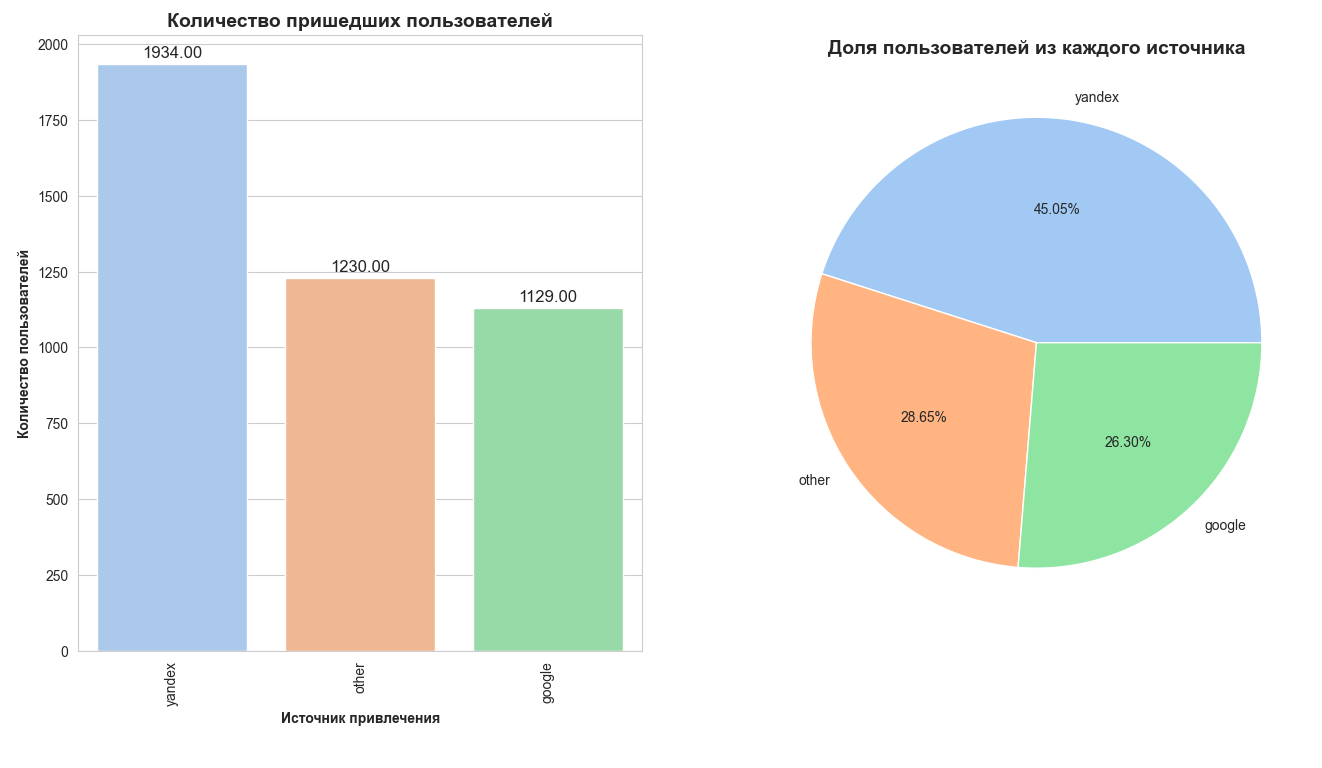

**Разделение пользователей по времени сессий**

Было выделено 4 группы пользователей, различающихся по времени, проведённом в приложении:
- `null` - длительность 0 секунд - `299 (6.98%)`;
- `short`- длительность от 0.02 включительно до 3.43 минут включительно - `1152 (26.9%)`;
- `mean` - длительность от 3.43 до 11.15 минут включительно - `1482 (34.61%)`;
- `long`- длительность от 11.15 минут - `1349 (31.50%)`.

**`В среднем пользователи приложения проводят в приложении около 7 - ми минут`**

*Нулевые сессии (или сессии с одним действием) составляют `23.25%` от всех сессий - это `больше 5-ти%`.*

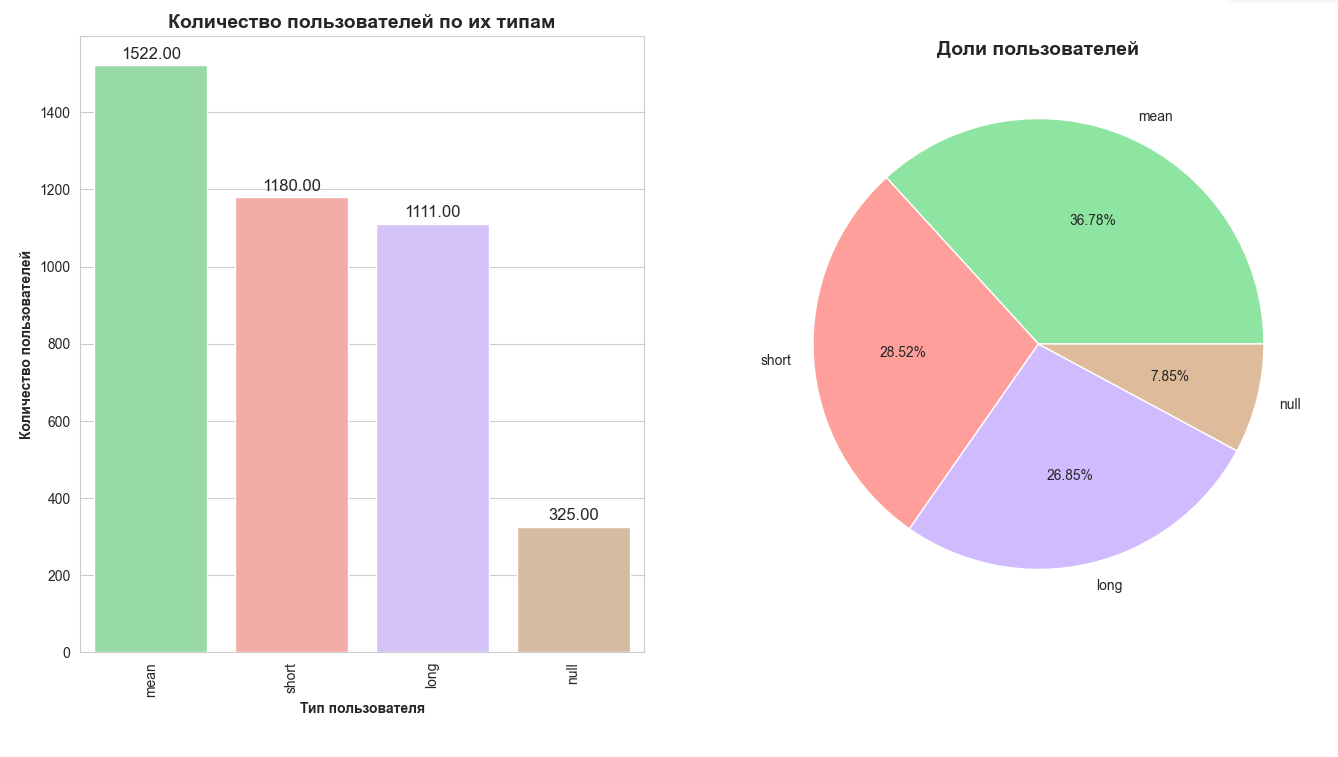

**Разделение пользователей по retention rate.**

Группы для сравнения retention rate были выделены по источникам:
- google - среднее значение retention rate на лайвтайме в 14 дней составляет `6.18` - пользователи, пришедшие из этого источника склонны чаще всех возвращаться в наше приложение повторно;
- other - среднее значение retention rate на лайвтайме в 14 дней составляет `6.17`;
- yandex - среднее значение retention rate на лайвтайме в 14 дней составляет `6.14`.

*Можно сказать, что между источниками, через которые пользователи скачали наше приложение, практически нету отличий и среднее удержание находится на уровне `~6.16%`*

**Выделение групп по частоте кликов**

Было осуществлено деление пользовательских действий по времени суток. Выделили 4 группы:
- ночная `(00:00 - 6:00)` - `3749` кликов
- утренняя `(6:00 - 12:00)` - `13733` кликов
- дневная `(12:00 - 18:00)` - `30070` кликов
- вечерняя `(18:00 - 00:00)` - `25502` кликов

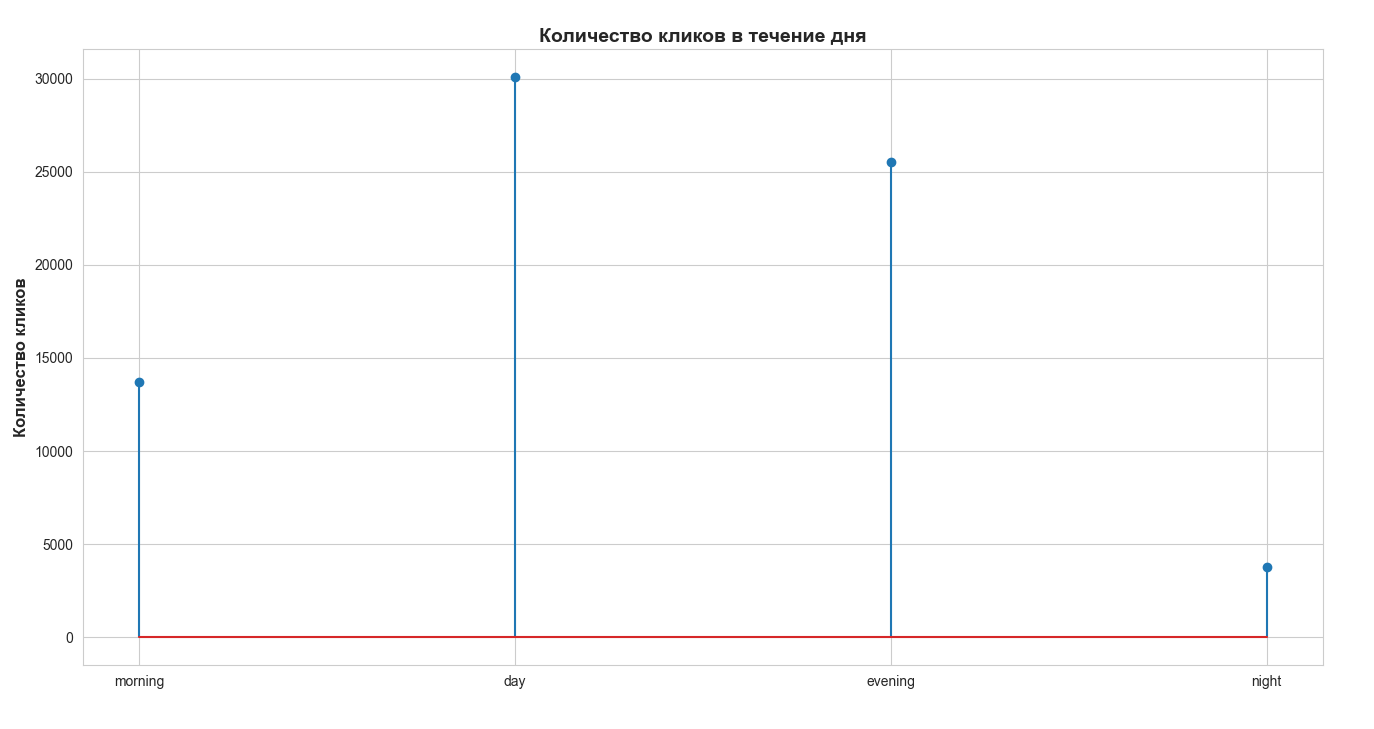

**Выделение групп по конверсии в целевое действие**

Несомненно лидеры - это `yandex` и `google`, но пользователи из `google` конвертируются немного хуже;

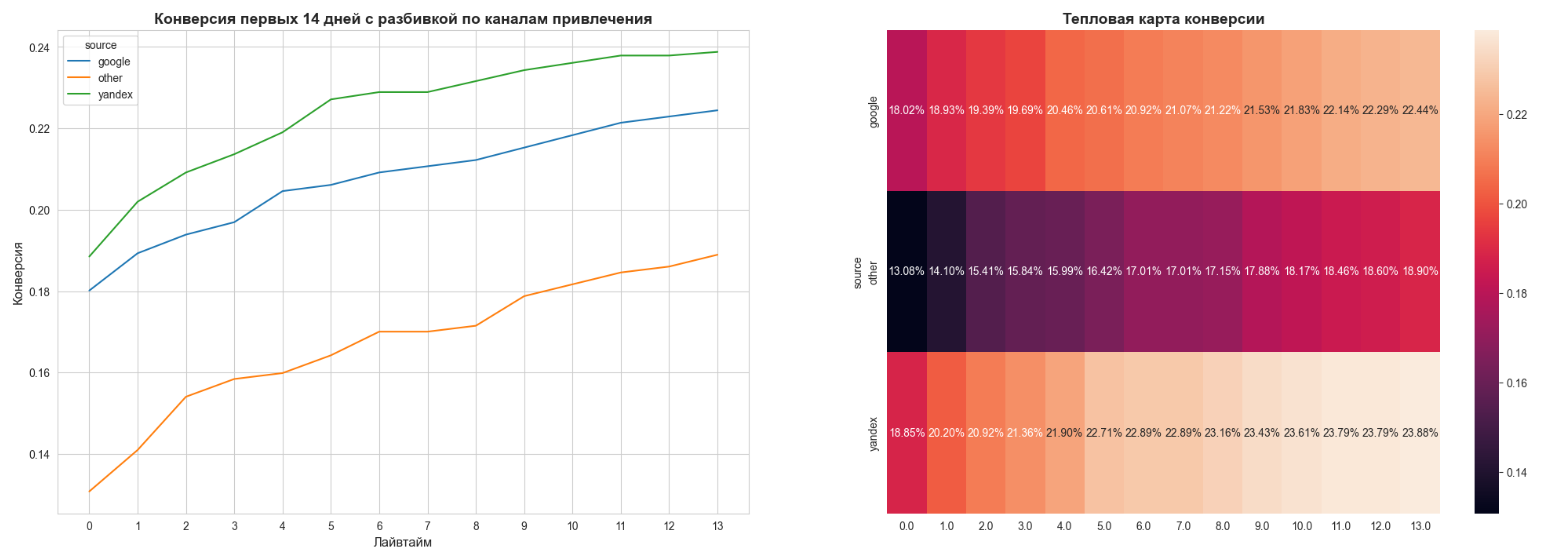

**Сегментирование**

Сегментирование пользователей проведем по частоте пользования приложением в разное время суток и на основании этого изучим их поведение, посмотрим как различается удержание таких пользователей, а также их конверсия в целевое действие, то есть, какие пользователи чаще просматривают номер продавца в объявлении (например, вечерние или утренние).

Пользователей мы выделем на основе сессий, которым присвоим статус (утро, день, вечер, ночь). Посчитаем количество сессий каждого пользователя, выявим, когда чаще он был активен и, на основании этого, присвоим ему группу. Группу будем назначать по времени старта сессии.

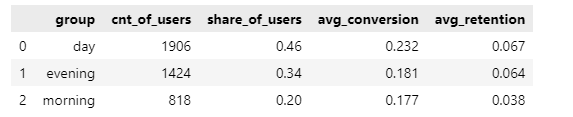

Доли пользователей распределены по сегментам следующим образом:
- day (дневные) - `1906 (46%)`
- evening (вечерние) - `1424 (34%)`
- morning (утренние) - `818 (20%)`

Основная часть наших пользователей, а именно - 80% проявляют пользуются приложением в промежутке между `12:00 - 00:00` (вторая половина суток)

Пользователи, которые в основном пользуются нашим приложением днем, проявляют самую высокую конверсию (`23%`) и удержание (`6.7%`); далее идут вечерние пользователи со схожим удержанием (`6.4%`), но более худшей конверсией (`18%`); самая "пассивная" группа - это пользователи, которые предпочитают пользоваться нашим приложением утром, конверсия данной группы составляет `17.8%`, а удержание - `3.8%`.

**Основные рекомендации:**

Вечерним пользователям для повышения конверсии стоит отправлять уведомления, напрямую связанные с товарами, которые они искали ранее, но при этом так и не совершили целевое действие, возможно человек просто отложил звонок продавцу на следующей день (потому что осуществлял выбор вечером), в таком случае такому пользователю стоит отправить уведомление - напоминание с утра или днем.

Когорта с утренними пользователями значительно меньше по размеру, чем вечерняя и дневная, возможно следует ввести "счастливые часы" на утреннее время (с 6:00 до 12:00), в которые будут действовать различные промо акции, тем самым мы имеем возможность повысить как конверсию пользователей, так и их количество. Для повышения удержания также можно оправлять пользователям изх этой категории уведомления - напоминания, но более общего характера о том, что рядом появилось объявление из интересующей вас категории ранее и т.п.

*Дополнительные рекомендации:*

1. Меньше всего пользователей находят нас через `google`, возможно, стоит увеличить рекламу в данном источнике, если мы рассматриваем его как основной и равный по значимости `yandex`.
2. Рекомендации по нулевым сессиям и тем, которые относится к группе `short`: пользователям с такими сессиями стоит отправлять больше пуш уведомлений по типу:
- Похоже вы не определились с выбором...
- Покупатель ждет вашего звонка...
- Посмотрите также...


3. Проанализировать пользователей, рекламные компании и другие события, которые произошли с нашим приложением `2019-10-12`. Есть шанс выявить факторы, которые могут привести к повышению удержания пользователей;
4. Если нам важна высокая конверсия не только у пользователей, пришедших с яндекса и гугла, то следует поработать/изменить подход к рекламной компании у источников, которые входят в группу `others`.